In [157]:
application_train = pd.read_csv('./data/application_train.csv')
application_train.shape

(307511, 122)

In [158]:
application_test = pd.read_csv('./data/application_test.csv')
application_test.shape

(48744, 121)

In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
application_train.replace('XNA', np.NaN, inplace = True)

application_train['age_yrs'] = np.negative(application_train['DAYS_BIRTH'])/365
application_train['yrs_emp'] = np.negative(application_train['DAYS_EMPLOYED'])/365
application_train['yrs_registration'] = np.negative(application_train['DAYS_REGISTRATION'])/365
application_train['yrs_id_publish'] = np.negative(application_train['DAYS_ID_PUBLISH'])/365
application_train['yrs_last_phone_change'] = np.negative(application_train['DAYS_LAST_PHONE_CHANGE'])/365

application_train = application_train.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis = 1)

In [160]:
application_test.replace('XNA', np.NaN, inplace = True)

application_test['age_yrs'] = np.negative(application_test['DAYS_BIRTH'])/365
application_test['yrs_emp'] = np.negative(application_test['DAYS_EMPLOYED'])/365
application_test['yrs_registration'] = np.negative(application_test['DAYS_REGISTRATION'])/365
application_test['yrs_id_publish'] = np.negative(application_test['DAYS_ID_PUBLISH'])/365
application_test['yrs_last_phone_change'] = np.negative(application_test['DAYS_LAST_PHONE_CHANGE'])/365

application_test = application_test.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis = 1)

#### Checking the TARGET variable

In [7]:
# appX_train = application_train.drop('TARGET', axis = 1)
appy_train = application_train['TARGET']

In [8]:
appy_train.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
# mean default-rate
np.mean(appy_train == 1)*100

8.072881945686495

It is an unbalanced data-set with just 8.07% defaults.

#### Checking data-types of different features

In [10]:
application_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

#### Exploring continuous (float) variables

In [11]:
# application_train.dtypes[application_train.dtypes == 'float64'].index

(array([3.07506e+05, 2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 5.87436750e+06, 1.17230850e+07, 1.75718025e+07,
        2.34205200e+07, 2.92692375e+07, 3.51179550e+07, 4.09666725e+07,
        4.68153900e+07, 5.26641075e+07, 5.85128250e+07, 6.43615425e+07,
        7.02102600e+07, 7.60589775e+07, 8.19076950e+07, 8.77564125e+07,
        9.36051300e+07, 9.94538475e+07, 1.05302565e+08, 1.11151282e+08,
        1.17000000e+08]),
 <a list of 20 Patch objects>)

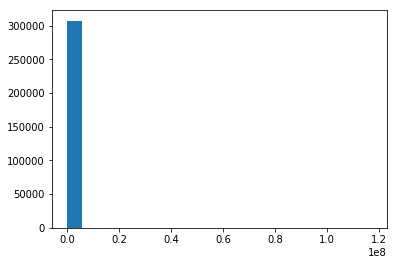

In [12]:
# AMT_INCOME_TOTAL: Income of the client; self proclaimed and not verified 
plt.hist(application_train.AMT_INCOME_TOTAL, bins = 20)

There seems to be some anomaly on the higher side

In [13]:
application_train.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Max. is of a different order (e+08) compared to the other values. As per information provided by Home Credit the income data is self proclaimed and not verified. So these most probably are incorrect. 

In [14]:
application_train.AMT_INCOME_TOTAL.sort_values(ascending = False).head(10)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
204564      4500000.0
103006      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
Name: AMT_INCOME_TOTAL, dtype: float64

In [15]:
inc_anomalies = application_train[(application_train.AMT_INCOME_TOTAL - np.mean(application_train.AMT_INCOME_TOTAL))/np.std(application_train.AMT_INCOME_TOTAL) > 3]
round(inc_anomalies.shape[0]/application_train.shape[0]*100, 2)

0.15

0.15% of the values are more than 3-sigma higher than the mean. Replacing these by mean as they most probably are wrongly proclaimed values or data-errors.

In [16]:
application_train.AMT_INCOME_TOTAL.replace(inc_anomalies.AMT_INCOME_TOTAL.values, np.mean(application_train.AMT_INCOME_TOTAL), inplace = True)

(array([2.1274e+04, 4.8240e+04, 8.6875e+04, 6.3229e+04, 4.2743e+04,
        1.8854e+04, 1.0616e+04, 6.6720e+03, 3.1150e+03, 3.2100e+03,
        1.5900e+02, 3.4600e+02, 8.4300e+02, 2.2000e+02, 1.5200e+02,
        6.8400e+02, 8.9000e+01, 6.7000e+01, 9.5000e+01, 2.8000e+01]),
 array([ 25650. ,  68242.5, 110835. , 153427.5, 196020. , 238612.5,
        281205. , 323797.5, 366390. , 408982.5, 451575. , 494167.5,
        536760. , 579352.5, 621945. , 664537.5, 707130. , 749722.5,
        792315. , 834907.5, 877500. ]),
 <a list of 20 Patch objects>)

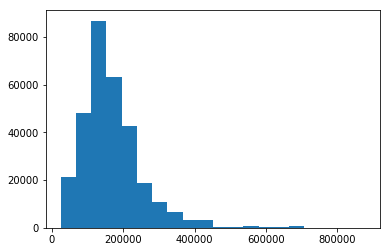

In [17]:
plt.hist(application_train.AMT_INCOME_TOTAL, bins = 20)

TARGET          
                   count      mean
AMT_INCOME_TOTAL                  
b1                113573  0.084492
b2                148788  0.082614
b3                 31672  0.067915
b4                 10795  0.059009
b5                  1278  0.060250
b6                   442  0.058824
b7                   831  0.045728
b8                   132  0.060606

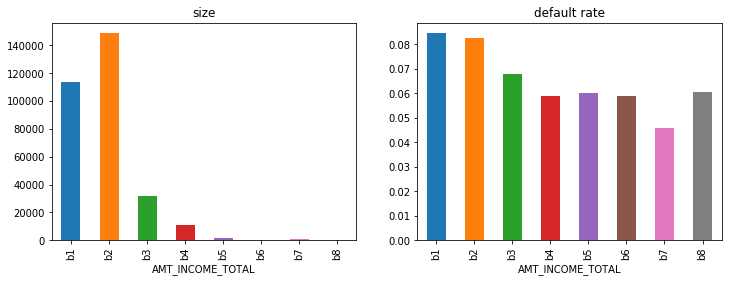

In [18]:
x = pd.cut(application_train.AMT_INCOME_TOTAL, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_INCOME_TOTAL': x})
df = df.groupby('AMT_INCOME_TOTAL').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


(array([5.5724e+04, 6.9294e+04, 6.6670e+04, 4.6097e+04, 2.6641e+04,
        1.8003e+04, 1.3042e+04, 5.7440e+03, 3.1970e+03, 1.6530e+03,
        4.7100e+02, 5.5900e+02, 2.9800e+02, 7.5000e+01, 1.2000e+01,
        1.1000e+01, 6.0000e+00, 2.0000e+00, 0.0000e+00, 1.2000e+01]),
 array([  45000.,  245250.,  445500.,  645750.,  846000., 1046250.,
        1246500., 1446750., 1647000., 1847250., 2047500., 2247750.,
        2448000., 2648250., 2848500., 3048750., 3249000., 3449250.,
        3649500., 3849750., 4050000.]),
 <a list of 20 Patch objects>)

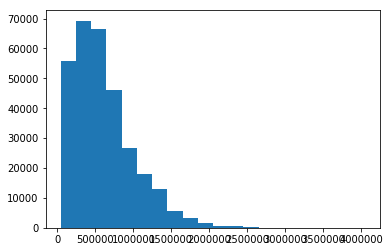

In [19]:
# AMT_CREDIT: Credit amount of the loan
print(application_train.AMT_CREDIT.describe())
plt.hist(application_train.AMT_CREDIT, bins = 20)

TARGET          
             count      mean
AMT_CREDIT                  
b1          171249  0.087271
b2           93177  0.079794
b3           35038  0.060534
b4            6602  0.042866
b5            1313  0.023610
b6             101  0.089109
b7              17  0.000000
b8              14  0.071429

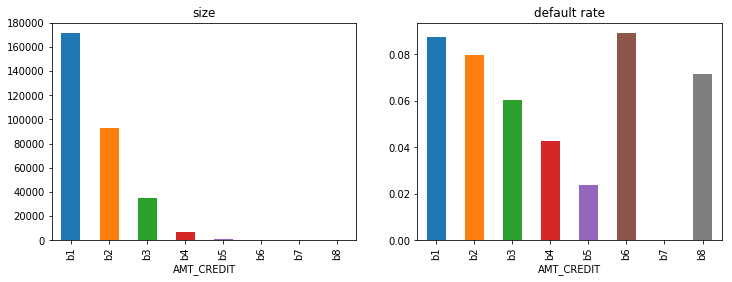

In [20]:
x = pd.cut(application_train.AMT_CREDIT, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_CREDIT': x})
df = df.groupby('AMT_CREDIT').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Though the distribution is skewed, but till bin5 the default-rates are following the trend, so are not outliers. Observations in bins 6 and 8 are so few that their having a higher default-rate might be entirely due to chance.

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


(array([1.78916e+05, 1.12480e+05, 1.44110e+04, 1.26800e+03, 3.02000e+02,
        6.10000e+01, 2.20000e+01, 5.00000e+00, 3.30000e+01, 1.00000e+00]),
 array([  1615.5,  27256.5,  52897.5,  78538.5, 104179.5, 129820.5,
        155461.5, 181102.5, 206743.5, 232384.5, 258025.5]),
 <a list of 10 Patch objects>)

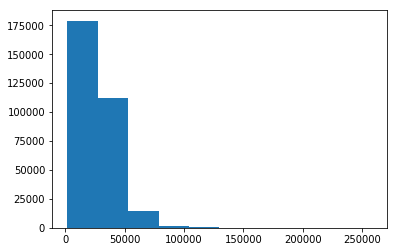

In [22]:
# AMT_ANNUITY: Loan annuity; monthly payment (interest rate included) that client will send  
# this is info at application time as some clients can change their annuity which you would see in the other tables (balance and payment tables)
print(application_train.AMT_ANNUITY.describe())
plt.hist(application_train.AMT_ANNUITY)

TARGET          
              count      mean
AMT_ANNUITY                  
b1           225895  0.083760
b2            76288  0.075071
b3             4735  0.035269
b4              459  0.019608
b5               64  0.015625
b6               21  0.000000
b7               35  0.000000
b8                2  0.000000

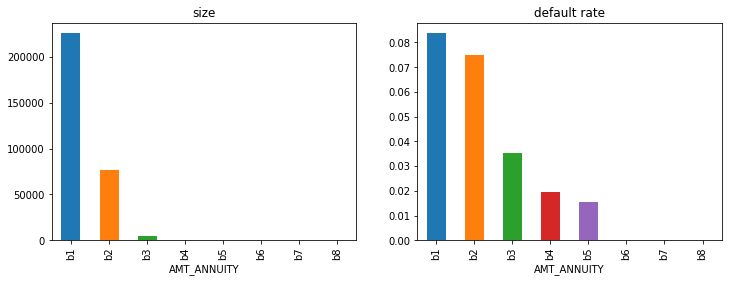

In [23]:
x = pd.cut(application_train.AMT_ANNUITY, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_ANNUITY': x})
df = df.groupby('AMT_ANNUITY').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Despite the skew the observations to right seem to be following the general trend; so not outliers, just high leverage points.


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


(array([1.31712e+05, 1.15261e+05, 4.36580e+04, 1.24290e+04, 3.17500e+03,
        9.33000e+02, 3.00000e+01, 1.70000e+01, 8.00000e+00, 1.00000e+01]),
 array([  40500.,  441450.,  842400., 1243350., 1644300., 2045250.,
        2446200., 2847150., 3248100., 3649050., 4050000.]),
 <a list of 10 Patch objects>)

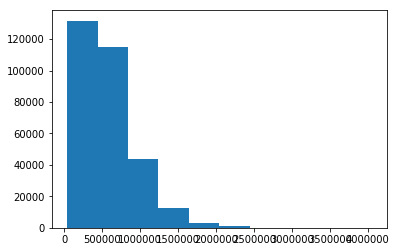

In [24]:
# AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given
print(application_train.AMT_GOODS_PRICE.describe())
plt.hist(application_train.AMT_GOODS_PRICE)

TARGET          
                  count      mean
AMT_GOODS_PRICE                  
b1               188926  0.089559
b2                85729  0.072962
b3                26002  0.052381
b4                 5578  0.043205
b5                  944  0.024364
b6                   24  0.083333
b7                   16  0.000000
b8                   14  0.071429

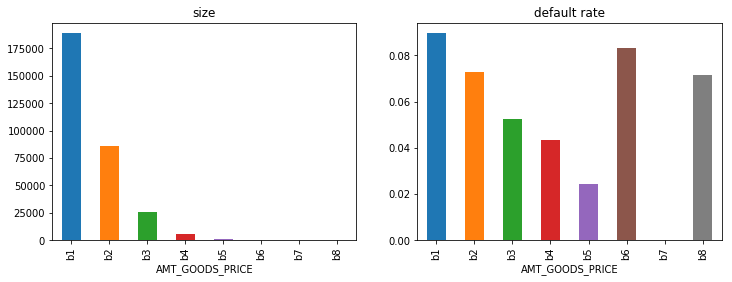

In [25]:
x = pd.cut(application_train.AMT_GOODS_PRICE, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_GOODS_PRICE': x})
df = df.groupby('AMT_GOODS_PRICE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Though the distribution is skewed, but till bin5 the default-rates are following the trend, so are not outliers. Observations in bins 6 and 8 are so few that their having a higher default-rate might be entirely due to chance.

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


(array([50417., 62475., 74375., 51862., 46528.,     0., 13442.,     0.,
            0.,  8412.]),
 array([0.00029  , 0.0075118, 0.0147336, 0.0219554, 0.0291772, 0.036399 ,
        0.0436208, 0.0508426, 0.0580644, 0.0652862, 0.072508 ]),
 <a list of 10 Patch objects>)

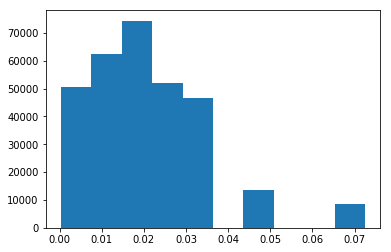

In [26]:
# REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in more populated region)
print(application_train.REGION_POPULATION_RELATIVE.describe())
plt.hist(application_train.REGION_POPULATION_RELATIVE)

TARGET          
                            count      mean
REGION_POPULATION_RELATIVE                 
b1                          65925  0.087964
b2                          70418  0.085887
b3                          91629  0.084253
b4                          57685  0.073867
b5                              0       NaN
b6                          13442  0.049323
b7                              0       NaN
b8                           8412  0.039705

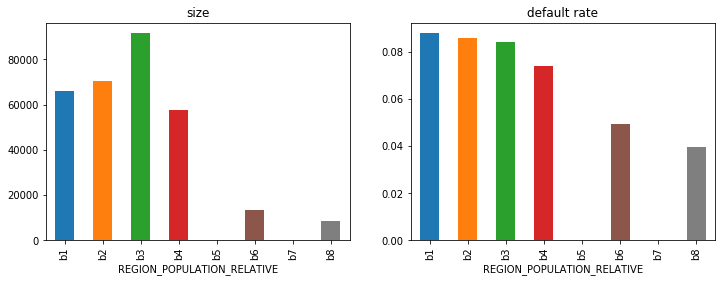

In [27]:
x = pd.cut(application_train.REGION_POPULATION_RELATIVE, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'REGION_POPULATION_RELATIVE': x})
df = df.groupby('REGION_POPULATION_RELATIVE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

There is a decreasing trend in default-rate with more populated regions.

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


(array([5.3501e+04, 3.4636e+04, 1.0248e+04, 2.3360e+03, 4.8600e+02,
        3.0000e+01, 8.0000e+00, 3.3350e+03, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <a list of 10 Patch objects>)

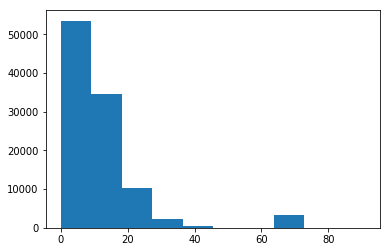

In [28]:
# OWN_CAR_AGE: Age of client's car
print(application_train.OWN_CAR_AGE.describe())
plt.hist(application_train.OWN_CAR_AGE)

TARGET          
             count      mean
OWN_CAR_AGE                 
b1           62468  0.061183
b2           31772  0.088285
b3            6200  0.094839
b4             767  0.102999
b5              35  0.028571
b6            3337  0.083908
b7               1  0.000000
b8               2  0.500000

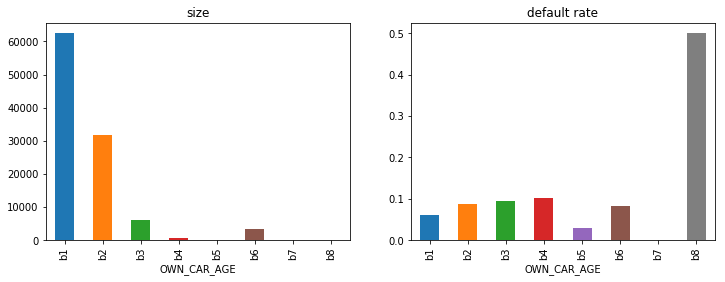

In [29]:
x = pd.cut(application_train.OWN_CAR_AGE, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'OWN_CAR_AGE': x})
df = df.groupby('OWN_CAR_AGE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Slight increase in default-rate with age of car. There are very few values in bin 5-8, so any variation here might be purely by chance.

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


(array([2.26204e+05, 7.72980e+04, 3.88600e+03, 1.01000e+02, 9.00000e+00,
        3.00000e+00, 3.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <a list of 10 Patch objects>)

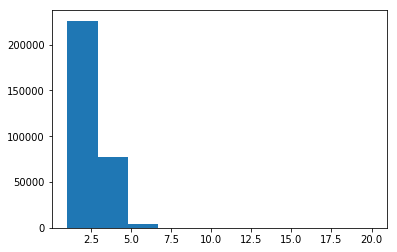

In [30]:
# CNT_FAM_MEMBERS: How many family members does client have
print(application_train.CNT_FAM_MEMBERS.describe())
plt.hist(application_train.CNT_FAM_MEMBERS)

TARGET          
                  count      mean
CNT_FAM_MEMBERS                  
b1               278805  0.079956
b2                28175  0.087418
b3                  509  0.131631
b4                    9  0.111111
b5                    3  0.333333
b6                    4  0.250000
b7                    2  0.000000
b8                    2  0.000000

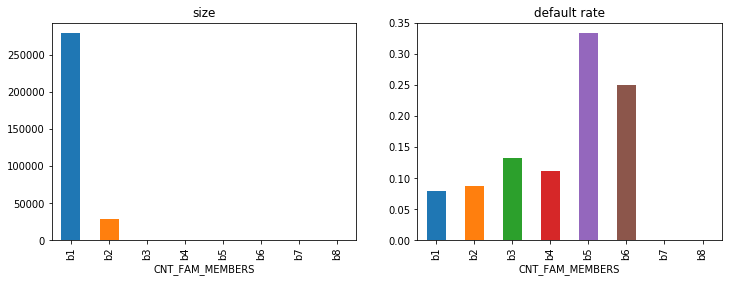

In [31]:
x = pd.cut(application_train.CNT_FAM_MEMBERS, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'CNT_FAM_MEMBERS': x})
df = df.groupby('CNT_FAM_MEMBERS').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Most have 2-3 family members. There is slight increase in defaults with increase in family members.

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


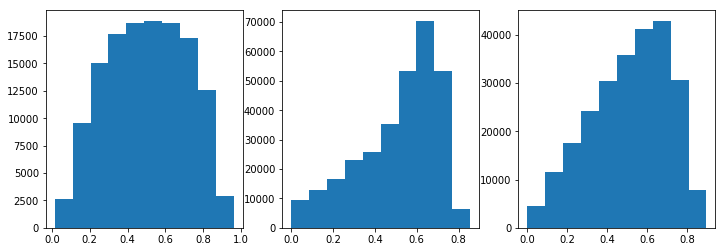

In [32]:
# EXT_SOURCE_1-3: Normalized score from external data source
fig = plt.figure(figsize=(12, 4))
for i in range(1,4):
    x = 'EXT_SOURCE_{}'.format(i)
    print(application_train[x].describe())
    plt.subplot(1,3,i)
    plt.hist(application_train[x])

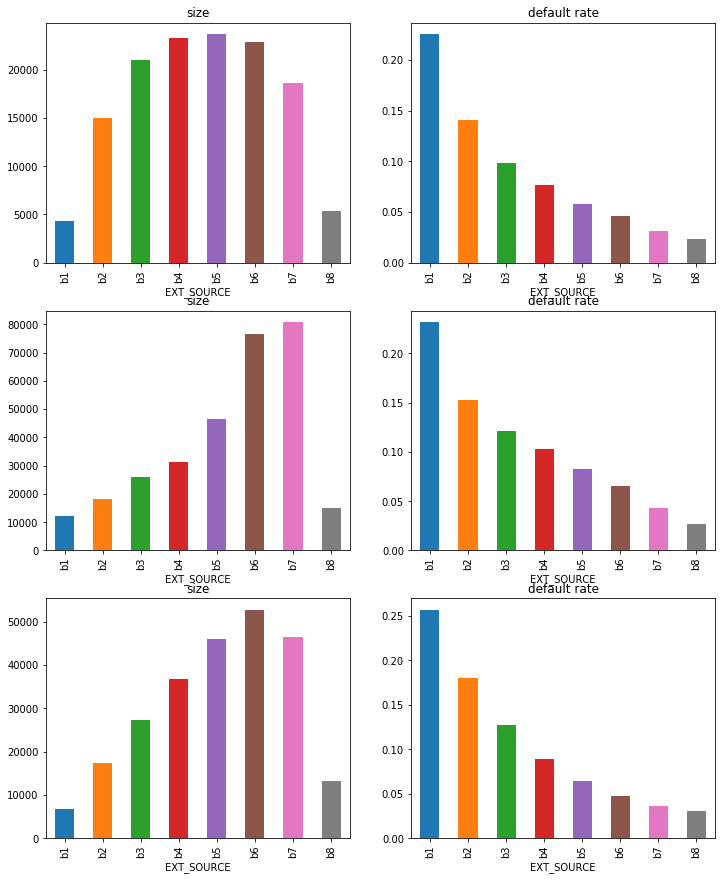

In [33]:
fig = plt.figure(figsize=(12, 15))
for i in range(1, 4):
    y = 'EXT_SOURCE_{}'.format(i)
    x = pd.cut(application_train[y], bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
    df = pd.DataFrame({'TARGET': appy_train, 'EXT_SOURCE': x})
    df = df.groupby('EXT_SOURCE').agg({'TARGET': ['count', 'mean']})
    plt.subplot(3, 2, 2*i-1)
    df.iloc[:, 0].plot.bar(title = 'size')
    plt.subplot(3, 2, 2*i)
    df.iloc[:, 1].plot.bar(title = 'default rate')
    df

Default-rates are decreasing with increase in the normalized EXT_SOURCE scores.

count    151450.00000
mean          0.11744
std           0.10824
min           0.00000
25%           0.05770
50%           0.08760
75%           0.14850
max           1.00000
Name: APARTMENTS_AVG, dtype: float64


(array([85837., 42580., 14182.,  4863.,  2062.,   926.,   510.,   168.,
          121.,   201.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

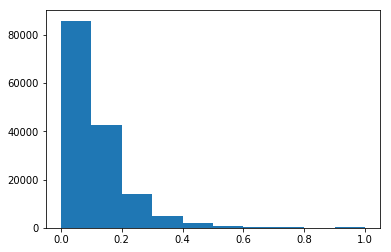

In [34]:
# APARTMENTS_AVG: Normalized information about the average apartment-size of the building where the client lives
print(application_train.APARTMENTS_AVG.describe())
plt.hist(application_train.APARTMENTS_AVG)

TARGET          
                 count      mean
APARTMENTS_AVG                  
b1              104883  0.073558
b2               32519  0.062487
b3                9122  0.058869
b4                3005  0.055241
b5                1086  0.045120
b6                 429  0.032634
b7                 160  0.050000
b8                 246  0.077236

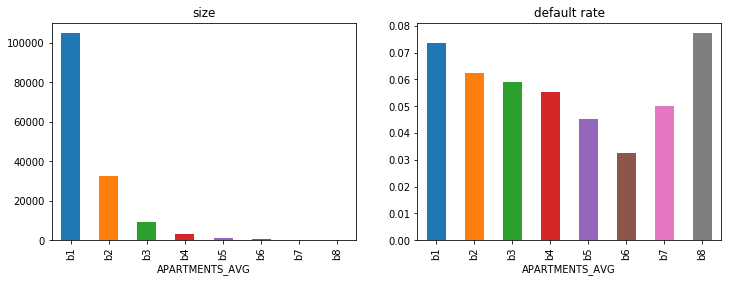

In [35]:
x = pd.cut(application_train.APARTMENTS_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'APARTMENTS_AVG': x})
df = df.groupby('APARTMENTS_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Decrease in default-rate with increase in apartments size.

count    127568.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64


(array([8.6873e+04, 3.2311e+04, 5.5230e+03, 1.7070e+03, 5.8500e+02,
        2.0400e+02, 9.5000e+01, 6.6000e+01, 4.3000e+01, 1.6100e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

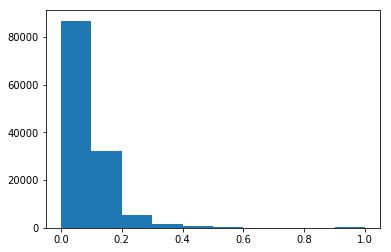

In [36]:
# BASEMENTAREA_AVG: Normalized information about the average basement-area of the building where the client lives
print(application_train.BASEMENTAREA_AVG.describe())
plt.hist(application_train.BASEMENTAREA_AVG)

TARGET          
                   count      mean
BASEMENTAREA_AVG                  
b1                102251  0.071432
b2                 20568  0.059899
b3                  3329  0.054070
b4                   857  0.052509
b5                   233  0.060086
b6                   109  0.027523
b7                    57  0.035088
b8                   164  0.042683

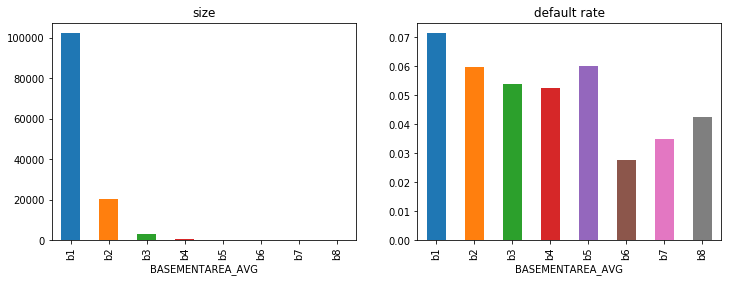

In [37]:
x = pd.cut(application_train.BASEMENTAREA_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'BASEMENTAREA_AVG': x})
df = df.groupby('BASEMENTAREA_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Not very clear link between basement-area and default-rates.

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


(array([5.19000e+02, 5.00000e+00, 5.00000e+00, 2.40000e+01, 9.30000e+01,
        7.00000e+00, 2.90000e+01, 1.20000e+01, 2.80000e+01, 1.56782e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

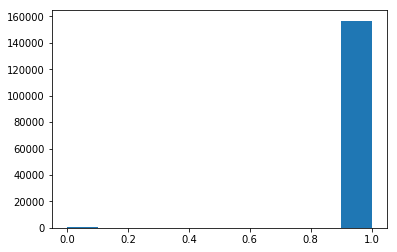

In [38]:
# YEARS_BEGINEXPLUATATION_AVG: Normalized information related to the average age of the building where the client lives
print(application_train.YEARS_BEGINEXPLUATATION_AVG.describe())
plt.hist(application_train.YEARS_BEGINEXPLUATATION_AVG)

TARGET          
                              count      mean
YEARS_BEGINEXPLUATATION_AVG                  
b1                              519  0.098266
b2                               10  0.000000
b3                               24  0.125000
b4                               93  0.075269
b5                                7  0.000000
b6                               37  0.027027
b7                               14  0.000000
b8                           156800  0.069866

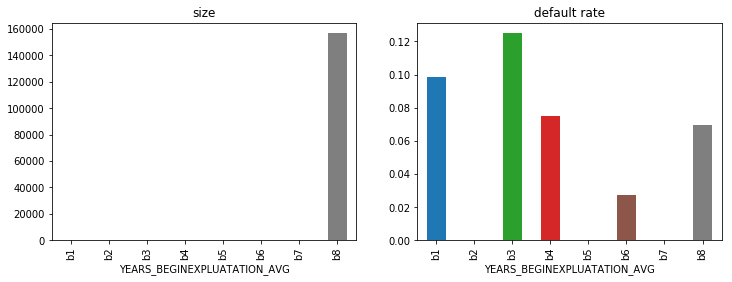

In [39]:
x = pd.cut(application_train.YEARS_BEGINEXPLUATATION_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'YEARS_BEGINEXPLUATATION_AVG': x})
df = df.groupby('YEARS_BEGINEXPLUATATION_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Almost all the houses have value close to 1 here.

count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64


(array([  159.,    73.,   250.,   632.,  1386.,  3284., 23063., 39386.,
        26370.,  8420.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

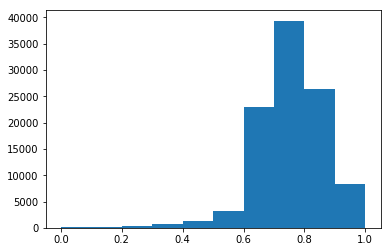

In [40]:
# YEARS_BUILD_AVG: Normalized information related to the average age of the building where the client lives
print(application_train.YEARS_BUILD_AVG.describe())
plt.hist(application_train.YEARS_BUILD_AVG)

TARGET          
                 count      mean
YEARS_BUILD_AVG                 
b1                 175  0.057143
b2                 168  0.059524
b3                 738  0.079946
b4                1419  0.086681
b5                5902  0.076245
b6               41498  0.072269
b7               42349  0.067203
b8               10774  0.053555

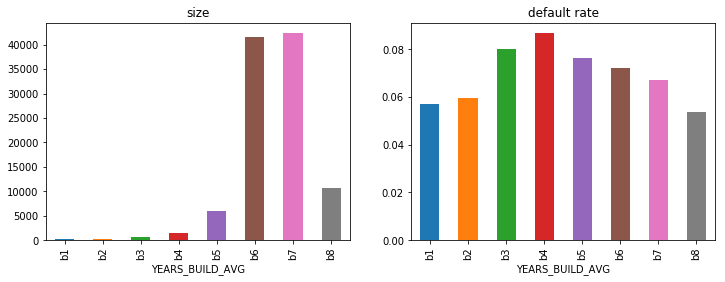

In [41]:
x = pd.cut(application_train.YEARS_BUILD_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'YEARS_BUILD_AVG': x})
df = df.groupby('YEARS_BUILD_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    92646.000000
mean         0.044621
std          0.076036
min          0.000000
25%          0.007800
50%          0.021100
75%          0.051500
max          1.000000
Name: COMMONAREA_AVG, dtype: float64


(array([8.2622e+04, 6.9000e+03, 1.6980e+03, 6.4300e+02, 3.5700e+02,
        1.5500e+02, 9.0000e+01, 4.2000e+01, 3.3000e+01, 1.0600e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

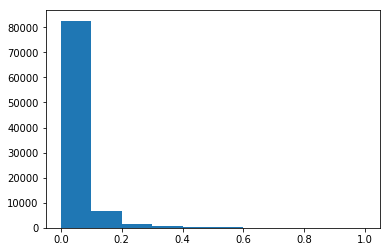

In [42]:
# COMMONAREA_AVG: Normalized information related to the average common-area of the building where the client lives
print(application_train.COMMONAREA_AVG.describe())
plt.hist(application_train.COMMONAREA_AVG)

TARGET          
                count      mean
COMMONAREA_AVG                 
b1              85525  0.070365
b2               5115  0.053763
b3               1067  0.060918
b4                513  0.050682
b5                171  0.058480
b6                 96  0.000000
b7                 45  0.022222
b8                114  0.061404

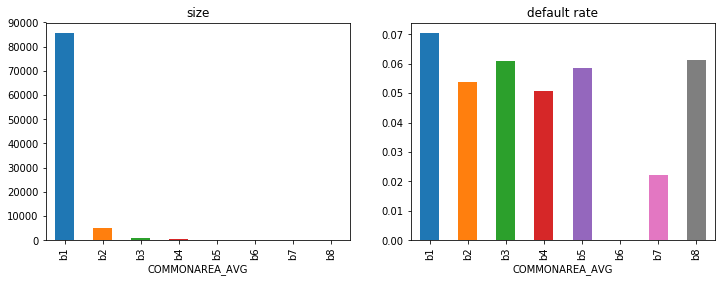

In [43]:
x = pd.cut(application_train.COMMONAREA_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'COMMONAREA_AVG': x})
df = df.groupby('COMMONAREA_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64


(array([102805.,  16961.,  13434.,   4565.,   3415.,   1083.,    574.,
           283.,    233.,    267.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

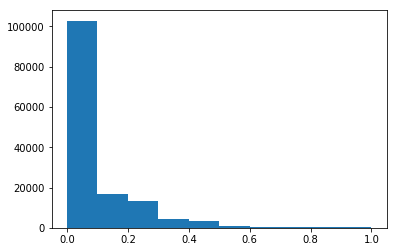

In [44]:
# ELEVATORS_AVG: Normalized information related to the average number of elevators of the building where the client lives
print(application_train.ELEVATORS_AVG.describe())
plt.hist(application_train.ELEVATORS_AVG)

TARGET          
                count      mean
ELEVATORS_AVG                  
b1             109377  0.073434
b2              21085  0.056581
b3               7206  0.054122
b4               3528  0.053005
b5               1073  0.042870
b6                796  0.047739
b7                220  0.036364
b8                335  0.047761

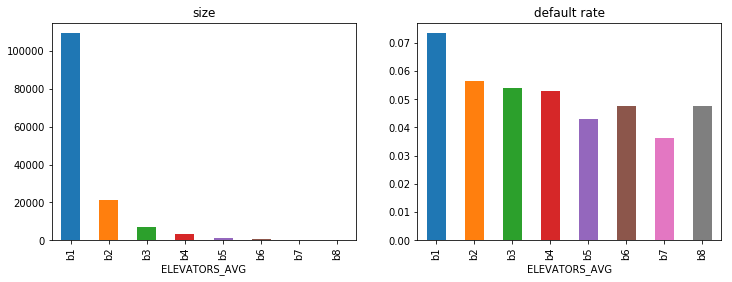

In [45]:
x = pd.cut(application_train.ELEVATORS_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'ELEVATORS_AVG': x})
df = df.groupby('ELEVATORS_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Most values are in 0-0.1 range. Decline in default-rates as this value goes-up.

count    152683.000000
mean          0.149725
std           0.100049
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64


(array([42475., 68729., 32289.,  5294.,  2190.,   843.,   425.,   131.,
          108.,   199.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

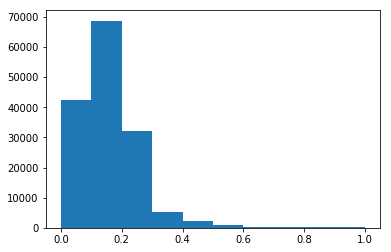

In [46]:
# ENTRANCES_AVG: Normalized information related to the average number of entrances of the building where the client lives
print(application_train.ENTRANCES_AVG.describe())
plt.hist(application_train.ENTRANCES_AVG)

TARGET          
               count      mean
ENTRANCES_AVG                 
b1             64049  0.076223
b2             71066  0.064911
b3             12652  0.064812
b4              3211  0.059483
b5              1083  0.054478
b6               228  0.092105
b7               143  0.090909
b8               251  0.059761

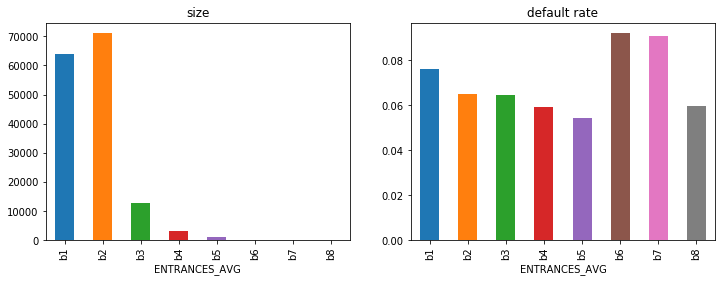

In [47]:
x = pd.cut(application_train.ENTRANCES_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'ENTRANCES_AVG': x})
df = df.groupby('ENTRANCES_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Most values between 0-0.3. Default-rates go down slightly as this value goes up.

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64


(array([24671., 70589.,  5858., 41693.,  4075.,  2843.,  3703.,   473.,
          294.,   292.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

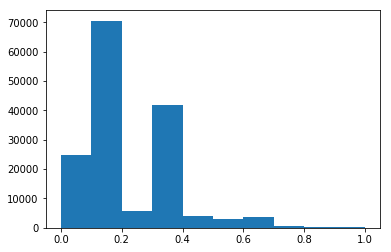

In [48]:
# FLOORSMAX_AVG: Normalized information related to the floors of the building where the client lives
print(application_train.FLOORSMAX_AVG.describe())
plt.hist(application_train.FLOORSMAX_AVG)

TARGET          
               count      mean
FLOORSMAX_AVG                 
b1             32227  0.087566
b2             67368  0.071176
b3             42765  0.059675
b4              4872  0.054598
b5              4552  0.047012
b6              2017  0.041150
b7               391  0.030691
b8               299  0.056856

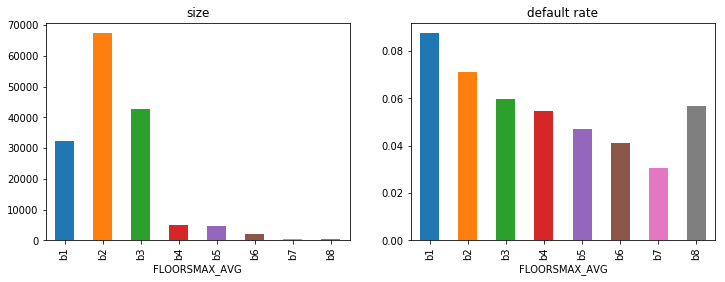

In [49]:
x = pd.cut(application_train.FLOORSMAX_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'FLOORSMAX_AVG': x})
df = df.groupby('FLOORSMAX_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64


(array([25477.,  7776., 35408., 19175.,  4700.,  3137.,  1598.,  1240.,
           76.,   282.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

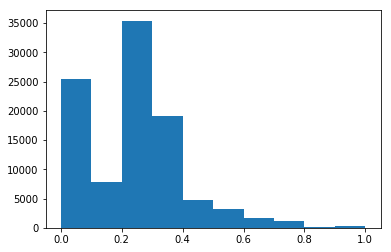

In [50]:
# FLOORSMIN_AVG: Normalized information related to the floor of the building where the client lives
print(application_train.FLOORSMIN_AVG.describe())
plt.hist(application_train.FLOORSMIN_AVG)

TARGET          
               count      mean
FLOORSMIN_AVG                 
b1             28965  0.077473
b2             38306  0.072469
b3             20235  0.060341
b4              6718  0.055374
b5              1730  0.044509
b6              2469  0.044147
b7               161  0.055901
b8               285  0.031579

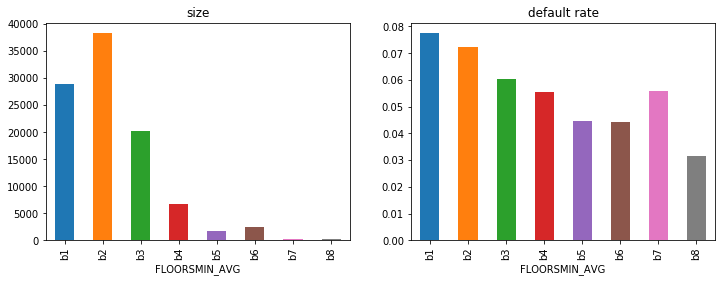

In [51]:
x = pd.cut(application_train.FLOORSMIN_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'FLOORSMIN_AVG': x})
df = df.groupby('FLOORSMIN_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Most values between 0 and 0.4. Decline in default-rate with increase in this value.

count    124921.000000
mean          0.066333
std           0.081184
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64


(array([1.00791e+05, 1.82930e+04, 3.58100e+03, 1.20800e+03, 4.43000e+02,
        1.88000e+02, 1.11000e+02, 8.20000e+01, 6.10000e+01, 1.63000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

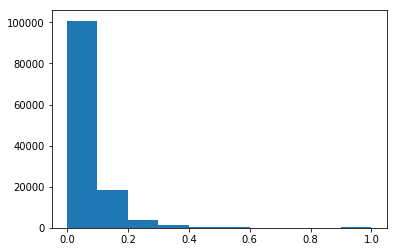

In [52]:
# LANDAREA_AVG: Normalized information related to the average landa area of the building where the client lives
print(application_train.LANDAREA_AVG.describe())
plt.hist(application_train.LANDAREA_AVG)

TARGET          
               count      mean
LANDAREA_AVG                  
b1            109093  0.070985
b2             12292  0.061829
b3              2294  0.061901
b4               637  0.048666
b5               221  0.063348
b6               129  0.062016
b7                80  0.062500
b8               175  0.097143

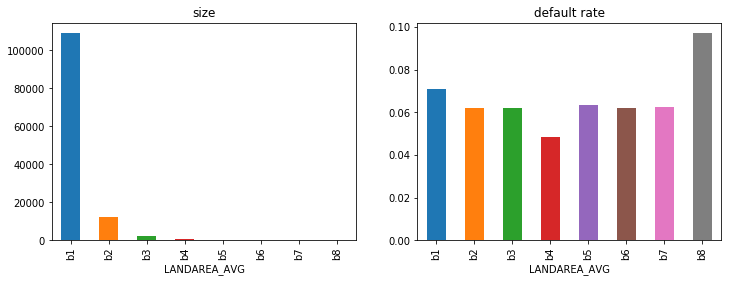

In [53]:
x = pd.cut(application_train.LANDAREA_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'LANDAREA_AVG': x})
df = df.groupby('LANDAREA_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Most values between 0 and 0.1. No clear link with default-rates.

count    97312.000000
mean         0.100775
std          0.092576
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64


(array([6.3140e+04, 2.3818e+04, 6.4810e+03, 2.3740e+03, 8.3700e+02,
        3.2400e+02, 1.5100e+02, 4.0000e+01, 3.3000e+01, 1.1400e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

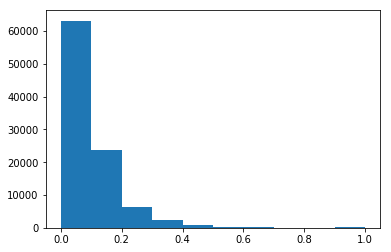

In [54]:
# LIVINGAPARTMENTS_AVG: Normalized information related to the average of the living apartments in the building where the client lives
print(application_train.LIVINGAPARTMENTS_AVG.describe())
plt.hist(application_train.LIVINGAPARTMENTS_AVG)

TARGET          
                      count      mean
LIVINGAPARTMENTS_AVG                 
b1                    74118  0.071508
b2                    17132  0.061989
b3                     4281  0.058398
b4                     1119  0.050938
b5                      366  0.038251
b6                      134  0.059701
b7                       43  0.093023
b8                      119  0.067227

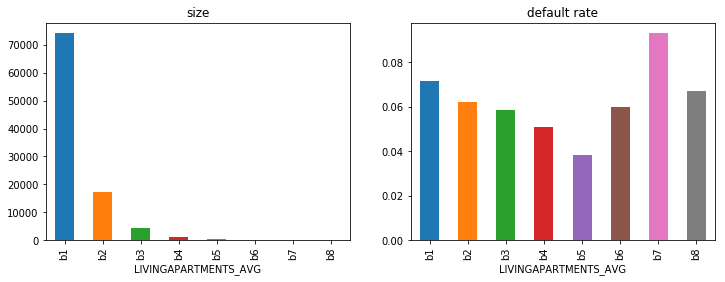

In [55]:
x = pd.cut(application_train.LIVINGAPARTMENTS_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'LIVINGAPARTMENTS_AVG': x})
df = df.groupby('LIVINGAPARTMENTS_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

Most of the values lie between 0 and 0.2. Decline in default-rates as the values go-up.

count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64


(array([99700., 32359., 12127.,  4735.,  2107.,   967.,   552.,   241.,
          151.,   222.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

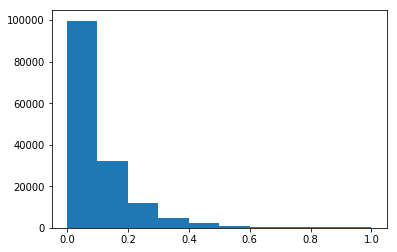

In [56]:
# LIVINGAREA_AVG: Normalized information related to the average living area of the building where the client lives
print(application_train.LIVINGAREA_AVG.describe())
plt.hist(application_train.LIVINGAREA_AVG)

TARGET          
                 count      mean
LIVINGAREA_AVG                  
b1              113287  0.074519
b2               26662  0.058660
b3                8166  0.053270
b4                2913  0.059389
b5                1156  0.050173
b6                 517  0.036750
b7                 201  0.034826
b8                 259  0.061776

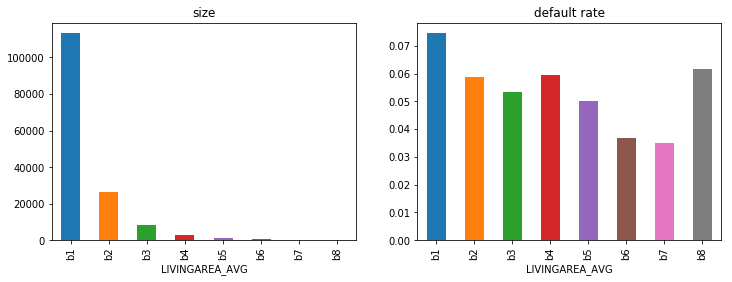

In [57]:
x = pd.cut(application_train.LIVINGAREA_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'LIVINGAREA_AVG': x})
df = df.groupby('LIVINGAREA_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    93997.000000
mean         0.008809
std          0.047732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


(array([9.2979e+04, 4.1800e+02, 2.1300e+02, 1.1600e+02, 6.0000e+01,
        2.8000e+01, 2.7000e+01, 1.5000e+01, 1.5000e+01, 1.2600e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

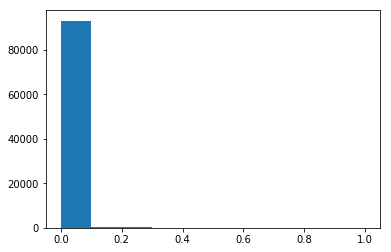

In [58]:
# NONLIVINGAPARTMENTS_AVG: Normalized information related to the average NONLIVINGAPARTMENTS of the building where the client lives
print(application_train.NONLIVINGAPARTMENTS_AVG.describe())
plt.hist(application_train.NONLIVINGAPARTMENTS_AVG)

TARGET          
                         count      mean
NONLIVINGAPARTMENTS_AVG                 
b1                       93162  0.069127
b2                         367  0.070845
b3                         177  0.056497
b4                          80  0.087500
b5                          35  0.114286
b6                          27  0.111111
b7                          20  0.050000
b8                         129  0.054264

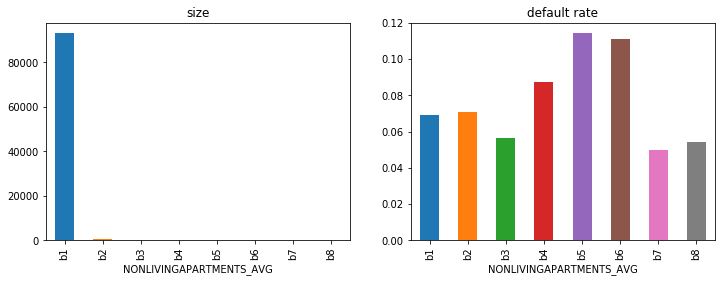

In [59]:
x = pd.cut(application_train.NONLIVINGAPARTMENTS_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'NONLIVINGAPARTMENTS_AVG': x})
df = df.groupby('NONLIVINGAPARTMENTS_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64


(array([1.2765e+05, 6.9130e+03, 1.7330e+03, 7.0300e+02, 3.1200e+02,
        1.7600e+02, 7.7000e+01, 7.8000e+01, 2.6000e+01, 1.6100e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

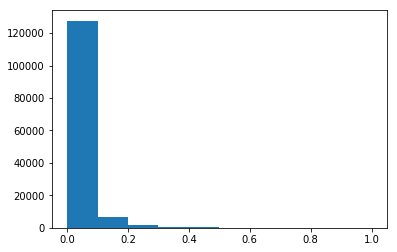

In [60]:
# NONLIVINGAREA_AVG: Normalized information related to the average NONLIVINGAREA of the building where the client lives
print(application_train.NONLIVINGAREA_AVG.describe())
plt.hist(application_train.NONLIVINGAREA_AVG)

TARGET          
                    count      mean
NONLIVINGAREA_AVG                  
b1                 130698  0.069427
b2                   4925  0.062538
b3                   1233  0.053528
b4                    455  0.052747
b5                    184  0.016304
b6                    120  0.066667
b7                     51  0.019608
b8                    163  0.067485

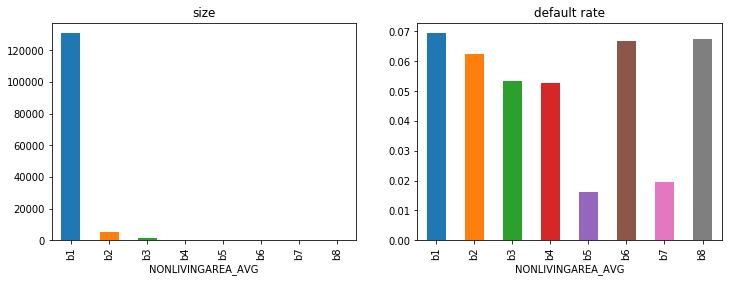

In [61]:
x = pd.cut(application_train.NONLIVINGAREA_AVG, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'NONLIVINGAREA_AVG': x})
df = df.groupby('NONLIVINGAREA_AVG').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    151450.000000
mean          0.114231
std           0.107936
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64
------------------------------
count    127568.000000
mean          0.087543
std           0.084307
min           0.000000
25%           0.040700
50%           0.074600
75%           0.112400
max           1.000000
Name: BASEMENTAREA_MODE, dtype: float64
------------------------------
count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64
------------------------------
count    103023.000000
mean          0.759637
std           0.110111
min           0.000000
25%           0.699400
50%           0.764800
75%           0.823600
max           1.000000
Name: YEARS_BUILD_MODE, dtype: float64
---

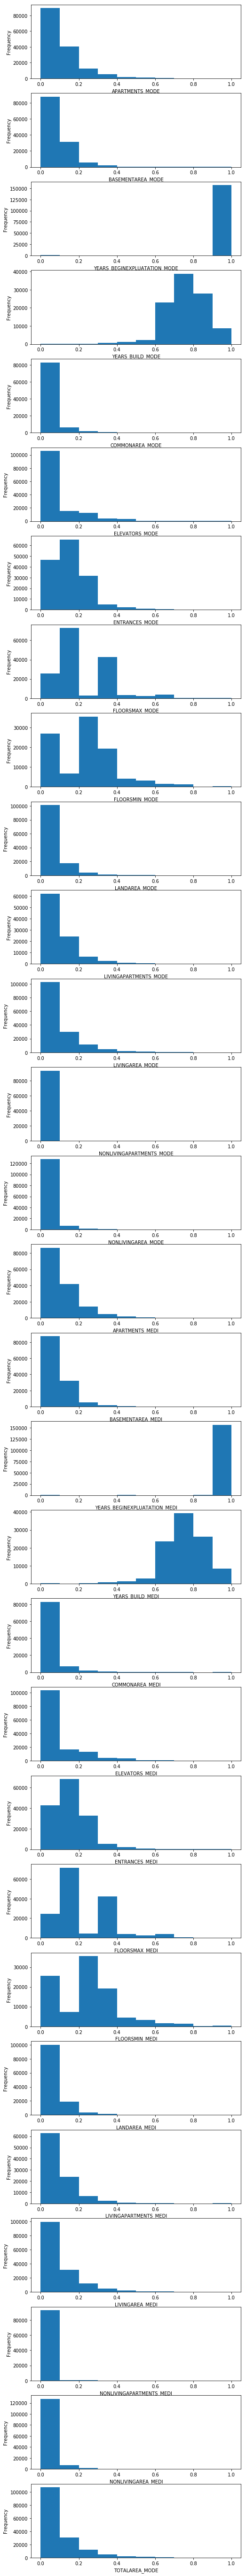

In [62]:
# Handling all features ending with 'MODE' or MEDI' together
vars = application_train.columns[application_train.columns.str.endswith(('MODE','MEDI'))]
vars = vars.drop(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'])
i = 1
fig = plt.figure(figsize=(8,100))
for var in vars:
    print(application_train[var].describe())
    print('-'*30)
    plt.subplot(len(vars), 1, i)
    application_train[var].plot.hist()
    plt.xlabel(var)
    i = i + 1

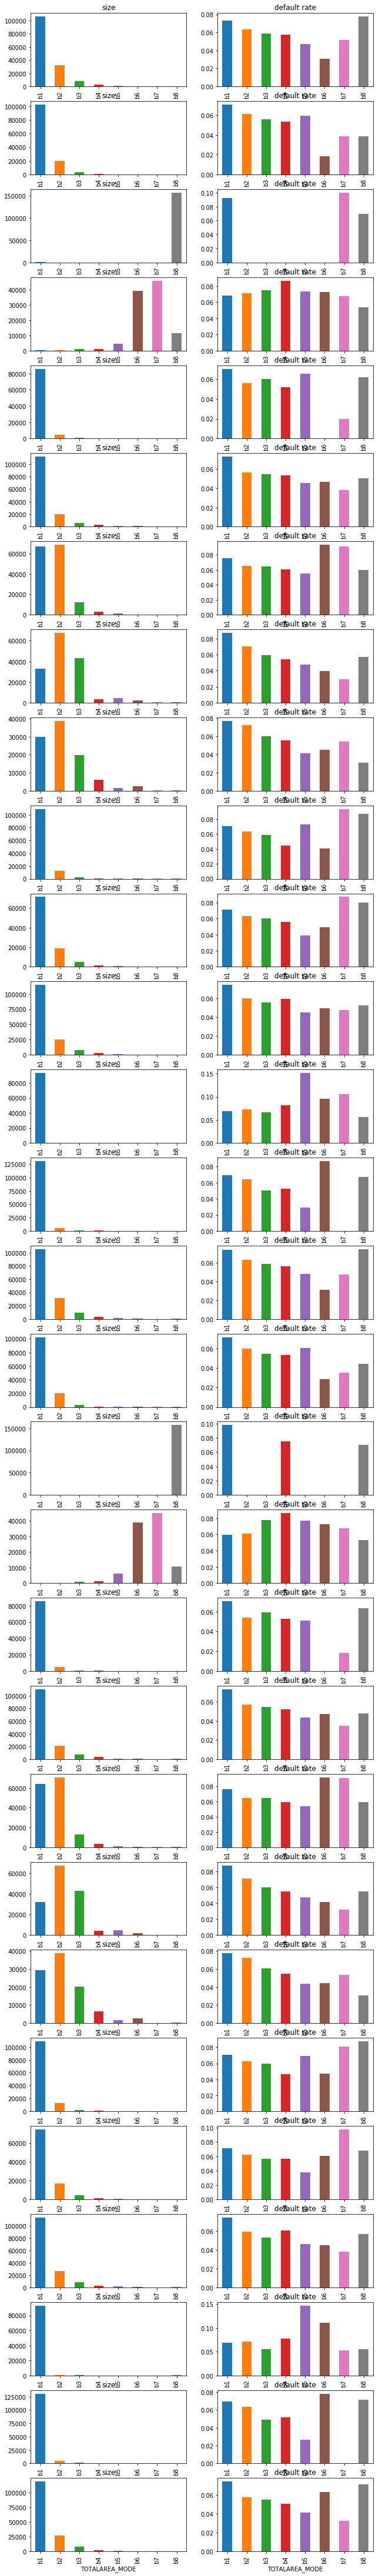

In [63]:
fig = plt.figure(figsize=(12, 40))
i = 1
for var in vars:
    x = pd.cut(application_train[var], bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
    df = pd.DataFrame({'TARGET': appy_train, '{}'.format(var): x})
    df = df.groupby(var).agg({'TARGET': ['count', 'mean']})
    plt.subplot(len(vars), 2, i)
    df.iloc[:, 0].plot.bar(title = 'size')
    plt.xlabel(var)
    plt.subplot(len(vars), 2, i+1)
    df.iloc[:, 1].plot.bar(title = 'default rate')
    plt.xlabel(var)
    plt.subplots_adjust(bottom=0, right=0.8, top=1.5)
    i = i+2
    df

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


(array([3.06488e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  34.8,  69.6, 104.4, 139.2, 174. , 208.8, 243.6, 278.4,
        313.2, 348. ]),
 <a list of 10 Patch objects>)

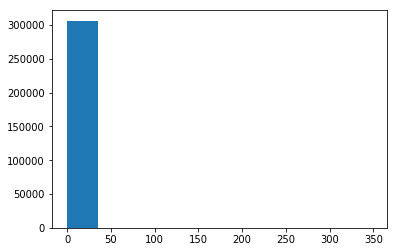

In [64]:
# OBS_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 30 DPD (days past due) default
print(application_train.OBS_30_CNT_SOCIAL_CIRCLE.describe())
plt.hist(application_train.OBS_30_CNT_SOCIAL_CIRCLE)

TARGET          
                           count      mean
OBS_30_CNT_SOCIAL_CIRCLE                  
b1                        306488  0.080881
b2                             1  0.000000
b3                             0       NaN
b4                             0       NaN
b5                             0       NaN
b6                             0       NaN
b7                             0       NaN
b8                             1  0.000000

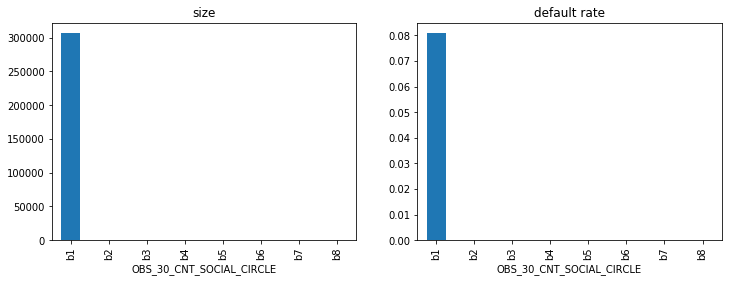

In [65]:
x = pd.cut(application_train.OBS_30_CNT_SOCIAL_CIRCLE, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'OBS_30_CNT_SOCIAL_CIRCLE': x})
df = df.groupby('OBS_30_CNT_SOCIAL_CIRCLE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

In [66]:
# replacing one aberration with mean
application_train.OBS_30_CNT_SOCIAL_CIRCLE.replace(max(application_train.OBS_30_CNT_SOCIAL_CIRCLE), np.mean(application_train.OBS_30_CNT_SOCIAL_CIRCLE), inplace = True)

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


(array([3.06167e+05, 3.20000e+02, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

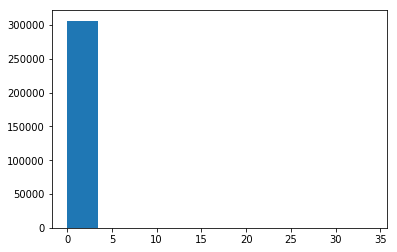

In [67]:
# DEF_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
print(application_train.DEF_30_CNT_SOCIAL_CIRCLE.describe())
plt.hist(application_train.DEF_30_CNT_SOCIAL_CIRCLE)

TARGET          
                           count      mean
DEF_30_CNT_SOCIAL_CIRCLE                  
b1                        306420  0.080869
b2                            69  0.130435
b3                             0       NaN
b4                             0       NaN
b5                             0       NaN
b6                             0       NaN
b7                             0       NaN
b8                             1  0.000000

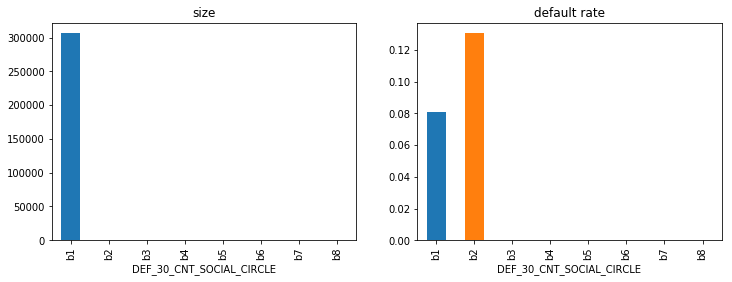

In [68]:
x = pd.cut(application_train.DEF_30_CNT_SOCIAL_CIRCLE, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'DEF_30_CNT_SOCIAL_CIRCLE': x})
df = df.groupby('DEF_30_CNT_SOCIAL_CIRCLE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

In [69]:
# replacing one aberration with mean
application_train.DEF_30_CNT_SOCIAL_CIRCLE.replace(max(application_train.DEF_30_CNT_SOCIAL_CIRCLE), np.mean(application_train.DEF_30_CNT_SOCIAL_CIRCLE), inplace = True)

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


(array([3.06488e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  34.4,  68.8, 103.2, 137.6, 172. , 206.4, 240.8, 275.2,
        309.6, 344. ]),
 <a list of 10 Patch objects>)

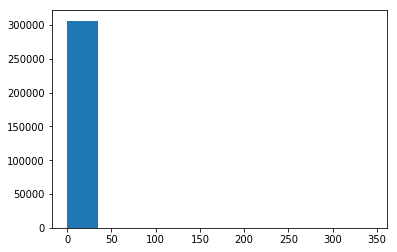

In [70]:
# OBS_60_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 60 DPD (days past due) default
print(application_train.OBS_60_CNT_SOCIAL_CIRCLE.describe())
plt.hist(application_train.OBS_60_CNT_SOCIAL_CIRCLE)

TARGET          
                           count      mean
OBS_60_CNT_SOCIAL_CIRCLE                  
b1                        306488  0.080881
b2                             1  0.000000
b3                             0       NaN
b4                             0       NaN
b5                             0       NaN
b6                             0       NaN
b7                             0       NaN
b8                             1  0.000000

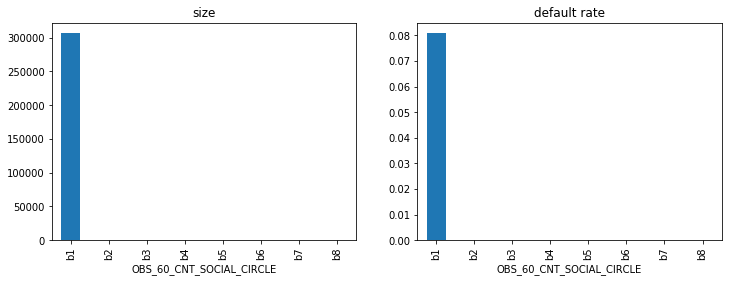

In [71]:
x = pd.cut(application_train.OBS_60_CNT_SOCIAL_CIRCLE, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'OBS_60_CNT_SOCIAL_CIRCLE': x})
df = df.groupby('OBS_60_CNT_SOCIAL_CIRCLE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

In [72]:
# replacing one aberration with mean
application_train.OBS_60_CNT_SOCIAL_CIRCLE.replace(max(application_train.OBS_60_CNT_SOCIAL_CIRCLE), np.mean(application_train.OBS_60_CNT_SOCIAL_CIRCLE), inplace = True)

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


(array([3.05732e+05, 7.33000e+02, 2.40000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

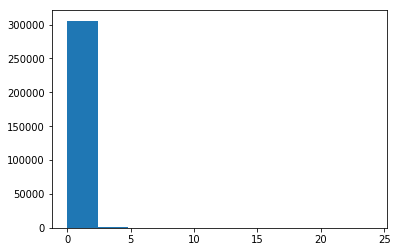

In [73]:
# DEF_60_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings defaulted on 60 (days past due) DPD
print(application_train.DEF_60_CNT_SOCIAL_CIRCLE.describe())
plt.hist(application_train.DEF_60_CNT_SOCIAL_CIRCLE)

TARGET          
                           count      mean
DEF_60_CNT_SOCIAL_CIRCLE                  
b1                        306330  0.080864
b2                           158  0.113924
b3                             1  0.000000
b4                             0       NaN
b5                             0       NaN
b6                             0       NaN
b7                             0       NaN
b8                             1  0.000000

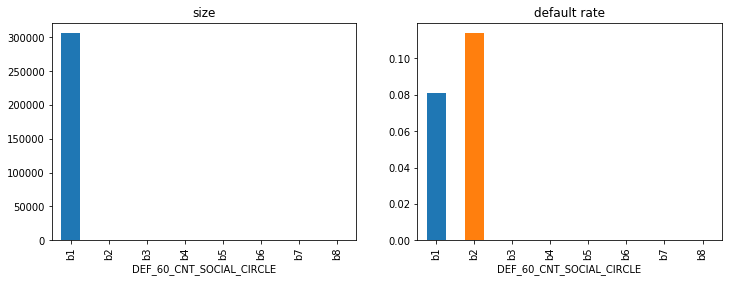

In [74]:
x = pd.cut(application_train.DEF_60_CNT_SOCIAL_CIRCLE, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'DEF_60_CNT_SOCIAL_CIRCLE': x})
df = df.groupby('DEF_60_CNT_SOCIAL_CIRCLE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

In [75]:
# replacing one aberration with mean
application_train.DEF_60_CNT_SOCIAL_CIRCLE.replace(max(application_train.DEF_60_CNT_SOCIAL_CIRCLE), np.mean(application_train.DEF_60_CNT_SOCIAL_CIRCLE), inplace = True)

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


(array([2.64366e+05, 0.00000e+00, 1.56000e+03, 0.00000e+00, 0.00000e+00,
        5.60000e+01, 0.00000e+00, 9.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

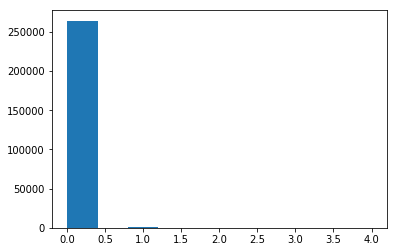

In [76]:
# AMT_REQ_CREDIT_BUREAU_HOUR: Number of enquiries to Credit Bureau about the client one hour before application
print(application_train.AMT_REQ_CREDIT_BUREAU_HOUR.describe())
plt.hist(application_train.AMT_REQ_CREDIT_BUREAU_HOUR)

TARGET          
                             count      mean
AMT_REQ_CREDIT_BUREAU_HOUR                  
b1                          264366  0.077173
b2                            1560  0.080128
b3                               0       NaN
b4                              56  0.107143
b5                               0       NaN
b6                               9  0.000000
b7                               0       NaN
b8                               1  0.000000

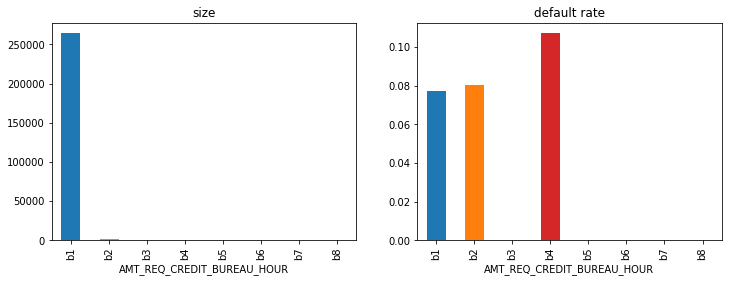

In [77]:
x = pd.cut(application_train.AMT_REQ_CREDIT_BUREAU_HOUR, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_REQ_CREDIT_BUREAU_HOUR': x})
df = df.groupby('AMT_REQ_CREDIT_BUREAU_HOUR').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


(array([2.64503e+05, 1.29200e+03, 1.06000e+02, 4.50000e+01, 2.60000e+01,
        9.00000e+00, 8.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

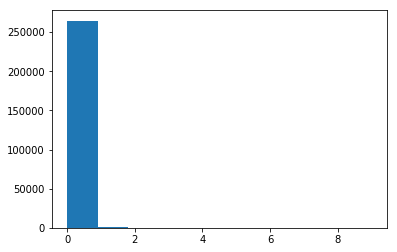

In [78]:
# AMT_REQ_CREDIT_BUREAU_DAY: Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
print(application_train.AMT_REQ_CREDIT_BUREAU_DAY.describe())
plt.hist(application_train.AMT_REQ_CREDIT_BUREAU_DAY)

TARGET          
                            count      mean
AMT_REQ_CREDIT_BUREAU_DAY                  
b1                         265795  0.077191
b2                            106  0.103774
b3                             45  0.044444
b4                             26  0.115385
b5                              9  0.000000
b6                              8  0.000000
b7                              0       NaN
b8                              3  0.000000

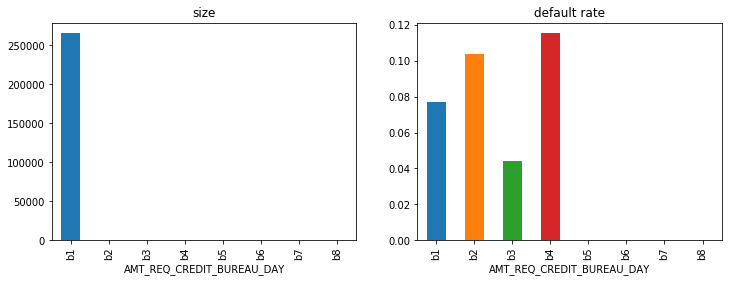

In [79]:
x = pd.cut(application_train.AMT_REQ_CREDIT_BUREAU_DAY, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_REQ_CREDIT_BUREAU_DAY': x})
df = df.groupby('AMT_REQ_CREDIT_BUREAU_DAY').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


(array([2.57456e+05, 8.20800e+03, 1.99000e+02, 5.80000e+01, 0.00000e+00,
        3.40000e+01, 1.00000e+01, 2.00000e+01, 2.00000e+00, 5.00000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

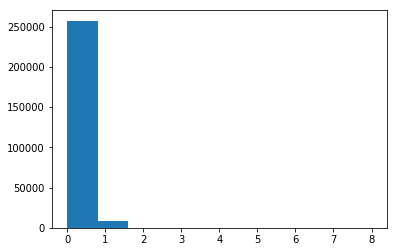

In [80]:
# AMT_REQ_CREDIT_BUREAU_WEEK: Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
print(application_train.AMT_REQ_CREDIT_BUREAU_WEEK.describe())
plt.hist(application_train.AMT_REQ_CREDIT_BUREAU_WEEK)

TARGET          
                             count      mean
AMT_REQ_CREDIT_BUREAU_WEEK                  
b1                          265664  0.077176
b2                             199  0.100503
b3                              58  0.068966
b4                              34  0.117647
b5                              10  0.100000
b6                              20  0.050000
b7                               2  0.000000
b8                               5  0.000000

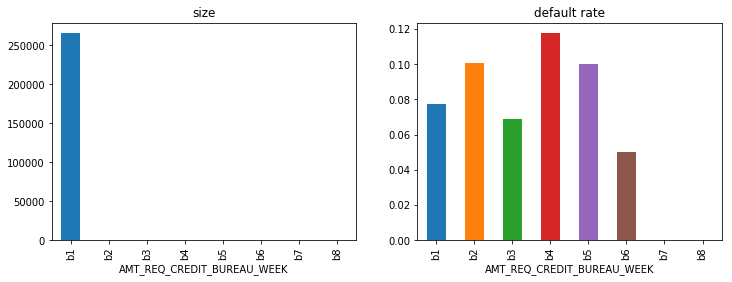

In [81]:
x = pd.cut(application_train.AMT_REQ_CREDIT_BUREAU_WEEK, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_REQ_CREDIT_BUREAU_WEEK': x})
df = df.groupby('AMT_REQ_CREDIT_BUREAU_WEEK').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


(array([2.60766e+05, 3.66900e+03, 8.26000e+02, 3.38000e+02, 2.68000e+02,
        9.80000e+01, 2.00000e+01, 3.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

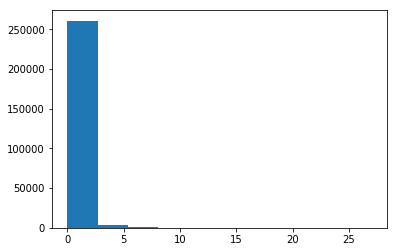

In [82]:
# AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
print(application_train.AMT_REQ_CREDIT_BUREAU_MON.describe())
plt.hist(application_train.AMT_REQ_CREDIT_BUREAU_MON)

TARGET          
                            count      mean
AMT_REQ_CREDIT_BUREAU_MON                  
b1                         262757  0.077494
b2                           2021  0.058387
b3                            821  0.051157
b4                            268  0.029851
b5                             98  0.020408
b6                             23  0.043478
b7                              2  0.000000
b8                              2  0.000000

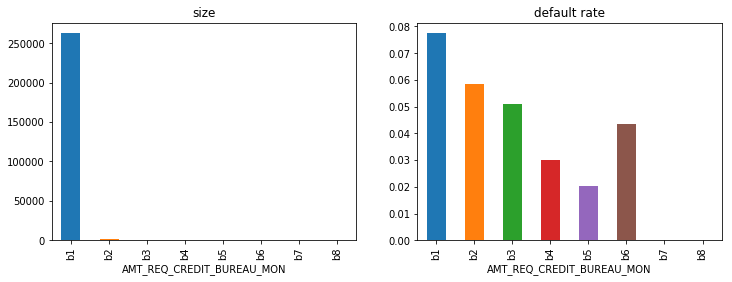

In [83]:
x = pd.cut(application_train.AMT_REQ_CREDIT_BUREAU_MON, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_REQ_CREDIT_BUREAU_MON': x})
df = df.groupby('AMT_REQ_CREDIT_BUREAU_MON').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


(array([2.65991e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  26.1,  52.2,  78.3, 104.4, 130.5, 156.6, 182.7, 208.8,
        234.9, 261. ]),
 <a list of 10 Patch objects>)

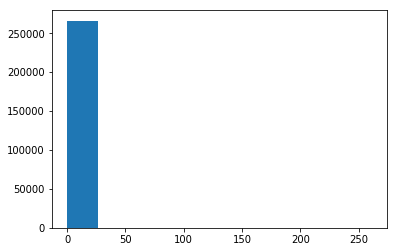

In [84]:
# AMT_REQ_CREDIT_BUREAU_QRT: Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
print(application_train.AMT_REQ_CREDIT_BUREAU_QRT.describe())
plt.hist(application_train.AMT_REQ_CREDIT_BUREAU_QRT)

TARGET          
                            count      mean
AMT_REQ_CREDIT_BUREAU_QRT                  
b1                         265991  0.077194
b2                              0       NaN
b3                              0       NaN
b4                              0       NaN
b5                              0       NaN
b6                              0       NaN
b7                              0       NaN
b8                              1  0.000000

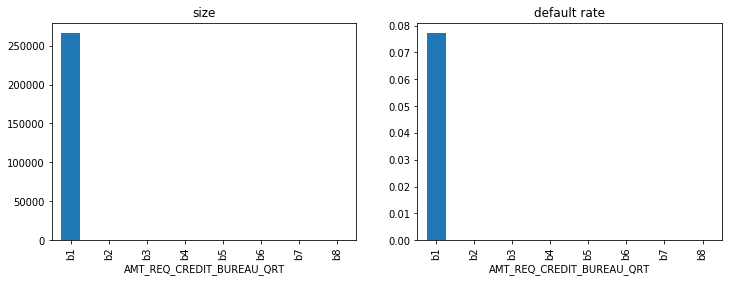

In [85]:
x = pd.cut(application_train.AMT_REQ_CREDIT_BUREAU_QRT, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_REQ_CREDIT_BUREAU_QRT': x})
df = df.groupby('AMT_REQ_CREDIT_BUREAU_QRT').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

In [86]:
# replacing one aberration with median
application_train.AMT_REQ_CREDIT_BUREAU_QRT.replace(max(application_train.AMT_REQ_CREDIT_BUREAU_QRT), np.median(application_train.AMT_REQ_CREDIT_BUREAU_QRT), inplace = True)

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


(array([1.85398e+05, 5.43420e+04, 2.28880e+04, 3.22300e+03, 8.30000e+01,
        2.90000e+01, 1.60000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

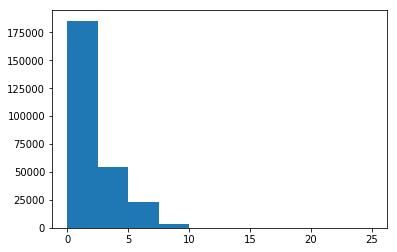

In [87]:
# AMT_REQ_CREDIT_BUREAU_YEAR
print(application_train.AMT_REQ_CREDIT_BUREAU_YEAR.describe())
plt.hist(application_train.AMT_REQ_CREDIT_BUREAU_YEAR)

TARGET          
                             count      mean
AMT_REQ_CREDIT_BUREAU_YEAR                  
b1                          219026  0.075411
b2                           39733  0.084187
b3                            7092  0.092781
b4                              83  0.084337
b5                              35  0.114286
b6                              14  0.071429
b7                               6  0.000000
b8                               3  0.333333

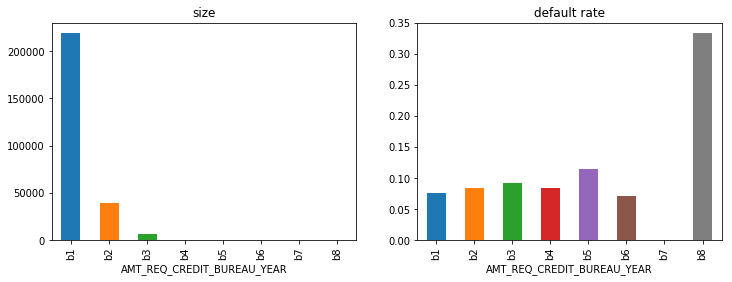

In [88]:
x = pd.cut(application_train.AMT_REQ_CREDIT_BUREAU_YEAR, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'AMT_REQ_CREDIT_BUREAU_YEAR': x})
df = df.groupby('AMT_REQ_CREDIT_BUREAU_YEAR').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: age_yrs, dtype: float64


(array([13679., 33111., 38424., 41746., 40356., 34339., 33544., 32650.,
        27685., 11977.]),
 array([20.51780822, 25.37808219, 30.23835616, 35.09863014, 39.95890411,
        44.81917808, 49.67945205, 54.53972603, 59.4       , 64.26027397,
        69.12054795]),
 <a list of 10 Patch objects>)

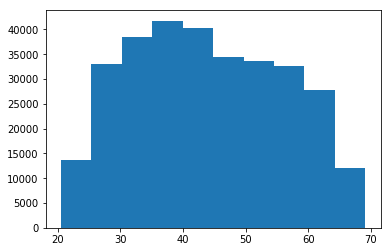

In [89]:
# age_yrs: Client's age in years at the time of application
print(application_train.age_yrs.describe())
plt.hist(application_train.age_yrs)

TARGET          
         count      mean
age_yrs                 
b1       19016  0.115271
b2       47520  0.110038
b3       49708  0.094331
b4       51100  0.080000
b5       42340  0.073335
b6       42345  0.063573
b7       37281  0.053700
b8       18201  0.045492

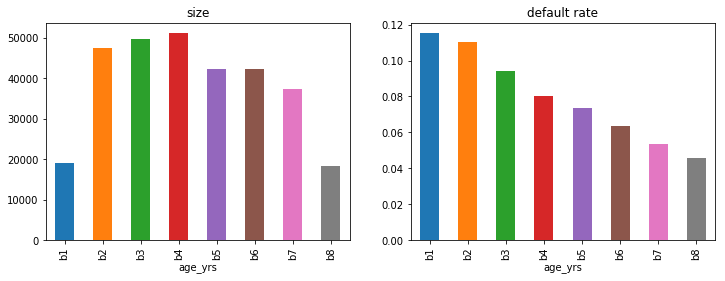

In [90]:
x = pd.cut(application_train.age_yrs, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'age_yrs': x})
df = df.groupby('age_yrs').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: yrs_emp, dtype: float64


(array([ 55374.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 252137.]),
 array([-1000.66575342,  -895.69178082,  -790.71780822,  -685.74383562,
         -580.76986301,  -475.79589041,  -370.82191781,  -265.84794521,
         -160.8739726 ,   -55.9       ,    49.0739726 ]),
 <a list of 10 Patch objects>)

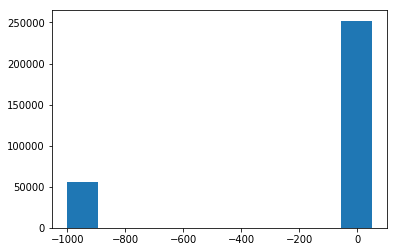

In [91]:
# yrs_emp
print(application_train.yrs_emp.describe())
plt.hist(application_train.yrs_emp)

TARGET          
          count      mean
yrs_emp                  
b1        55374  0.053996
b2            0       NaN
b3            0       NaN
b4            0       NaN
b5            0       NaN
b6            0       NaN
b7            0       NaN
b8       252137  0.086600

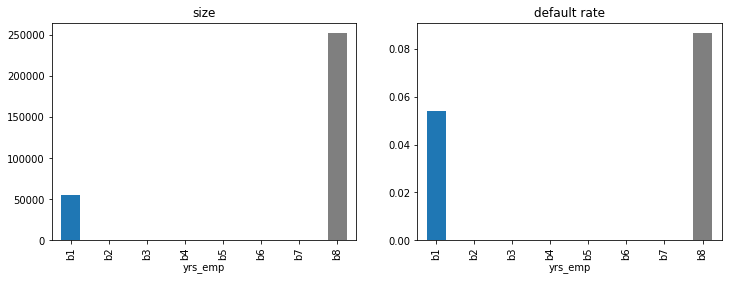

In [92]:
x = pd.cut(application_train.yrs_emp, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'yrs_emp': x})
df = df.groupby('yrs_emp').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: yrs_registration, dtype: float64


(array([9.0067e+04, 7.8873e+04, 6.0122e+04, 4.6717e+04, 2.2209e+04,
        8.0700e+03, 1.2880e+03, 1.3300e+02, 2.4000e+01, 8.0000e+00]),
 array([ 0.        ,  6.75945205, 13.51890411, 20.27835616, 27.03780822,
        33.79726027, 40.55671233, 47.31616438, 54.07561644, 60.83506849,
        67.59452055]),
 <a list of 10 Patch objects>)

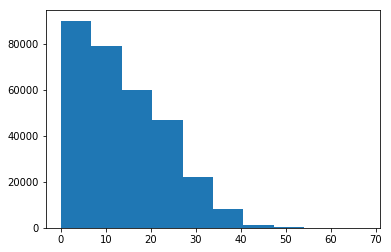

In [93]:
# yrs_registration
print(application_train.yrs_registration.describe())
plt.hist(application_train.yrs_registration)

TARGET          
                   count      mean
yrs_registration                  
b1                109629  0.090277
b2                 91822  0.085633
b3                 64209  0.072840
b4                 32334  0.058421
b5                  8671  0.053627
b6                   779  0.041078
b7                    56  0.017857
b8                    11  0.090909

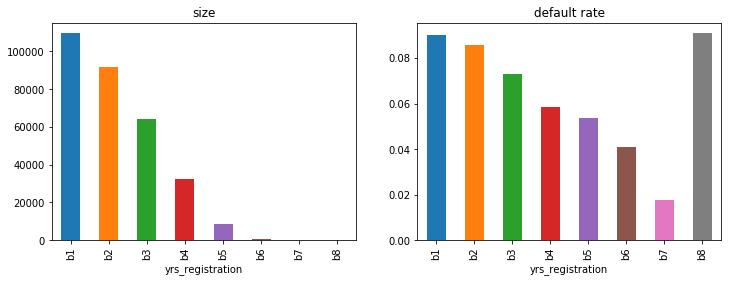

In [94]:
x = pd.cut(application_train.yrs_registration, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'yrs_registration': x})
df = df.groupby('yrs_registration').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: yrs_id_publish, dtype: float64


(array([3.0263e+04, 3.4011e+04, 3.3272e+04, 3.7008e+04, 3.7553e+04,
        6.0831e+04, 6.3624e+04, 9.8190e+03, 1.1280e+03, 2.0000e+00]),
 array([ 0.        ,  1.97178082,  3.94356164,  5.91534247,  7.88712329,
         9.85890411, 11.83068493, 13.80246575, 15.77424658, 17.7460274 ,
        19.71780822]),
 <a list of 10 Patch objects>)

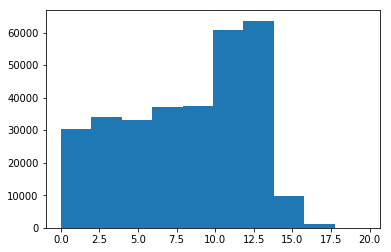

In [95]:
# yrs_id_publish
print(application_train.yrs_id_publish.describe())
plt.hist(application_train.yrs_id_publish)

TARGET          
                count      mean
yrs_id_publish                 
b1              38951  0.101897
b2              41647  0.095685
b3              44811  0.089286
b4              46698  0.081460
b5              81574  0.071297
b6              50332  0.060478
b7               3494  0.058958
b8                  4  0.000000

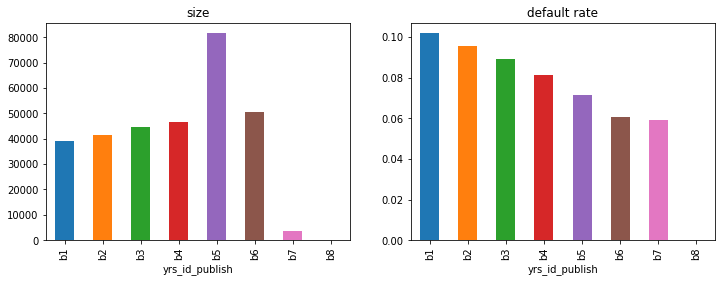

In [96]:
x = pd.cut(application_train.yrs_id_publish, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'yrs_id_publish': x})
df = df.groupby('yrs_id_publish').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: yrs_id_publish, dtype: float64


(array([3.0263e+04, 3.4011e+04, 3.3272e+04, 3.7008e+04, 3.7553e+04,
        6.0831e+04, 6.3624e+04, 9.8190e+03, 1.1280e+03, 2.0000e+00]),
 array([ 0.        ,  1.97178082,  3.94356164,  5.91534247,  7.88712329,
         9.85890411, 11.83068493, 13.80246575, 15.77424658, 17.7460274 ,
        19.71780822]),
 <a list of 10 Patch objects>)

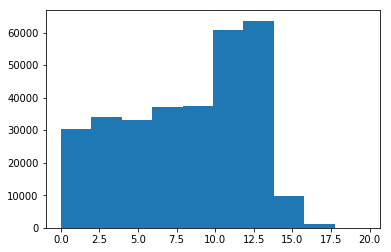

In [97]:
# yrs_last_phone_change
print(application_train.yrs_id_publish.describe())
plt.hist(application_train.yrs_id_publish)

TARGET          
                count      mean
yrs_id_publish                 
b1              38951  0.101897
b2              41647  0.095685
b3              44811  0.089286
b4              46698  0.081460
b5              81574  0.071297
b6              50332  0.060478
b7               3494  0.058958
b8                  4  0.000000

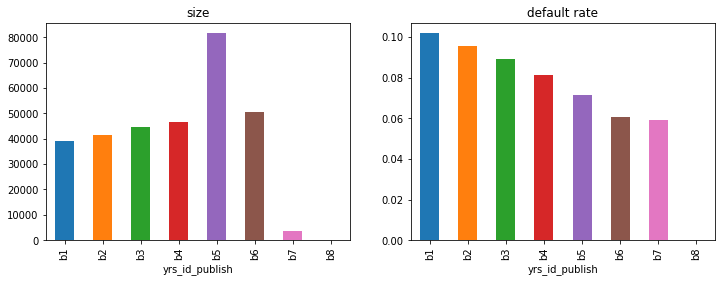

In [98]:
x = pd.cut(application_train.yrs_id_publish, bins = 8, labels = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])
df = pd.DataFrame({'TARGET': appy_train, 'yrs_id_publish': x})
df = df.groupby('yrs_id_publish').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title = 'size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title = 'default rate')
df

#### Exploring distribution of discrete(integer) variables

In [99]:
application_train.dtypes[application_train.dtypes == 'int64'].index

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

TARGET          
               count      mean
CNT_CHILDREN                  
0             215371  0.077118
1              61119  0.089236
2              26749  0.087218
3               3717  0.096314
4                429  0.128205
5                 84  0.083333
6                 21  0.285714
7                  7  0.000000
8                  2  0.000000
9                  2  1.000000
10                 2  0.000000
11                 1  1.000000
12                 2  0.000000
14                 3  0.000000
19                 2  0.000000

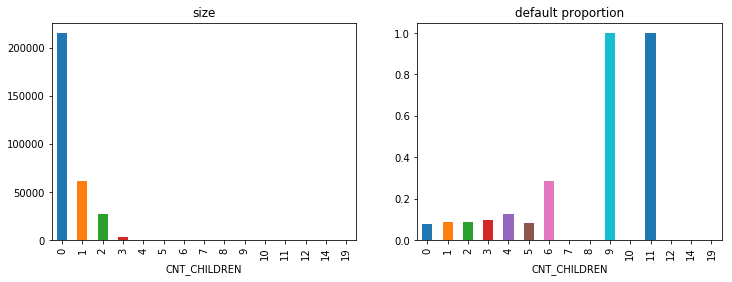

In [100]:
#CNT_CHILDREN: Number of children the client has
df = application_train.groupby('CNT_CHILDREN').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Most of the applicants do not have children. The default rate seems to be going up with number of children.

TARGET          
             count      mean
FLAG_MOBIL                  
0                1  0.000000
1           307510  0.080729

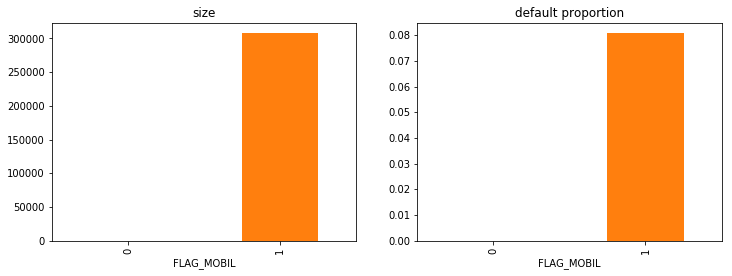

In [101]:
# FLAG_MOBIL: Did client provide mobile phone (1=YES, 0=NO)
df = application_train.groupby('FLAG_MOBIL').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Not very useful, as almost everybody has provided mobile number. Can be dropped.

TARGET          
                 count      mean
FLAG_EMP_PHONE                  
0                55386  0.054003
1               252125  0.086600

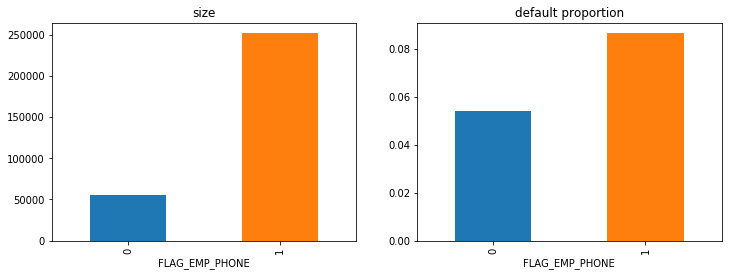

In [102]:
# FLAG_EMP_PHONE: Did client provide emp phone (1=YES, 0=NO)
df = application_train.groupby('FLAG_EMP_PHONE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Surprisingly default rates are higher for those who provided emp_phone.

TARGET          
                  count      mean
FLAG_WORK_PHONE                  
0                246203  0.076851
1                 61308  0.096301

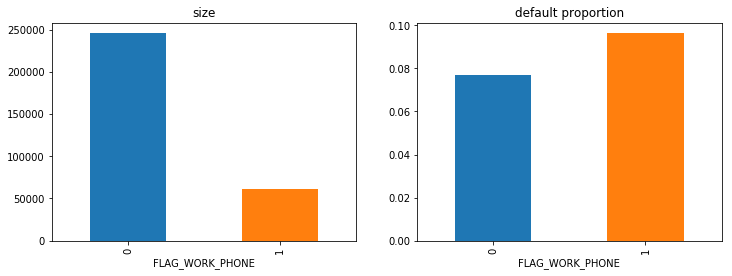

In [103]:
# FLAG_WORK_PHONE: Did client provide work phone (1=YES, 0=NO)
df = application_train.groupby('FLAG_WORK_PHONE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Surprisingly default rates are higher for those who provided work_phone.

TARGET          
                   count      mean
FLAG_CONT_MOBILE                  
0                    574  0.078397
1                 306937  0.080733

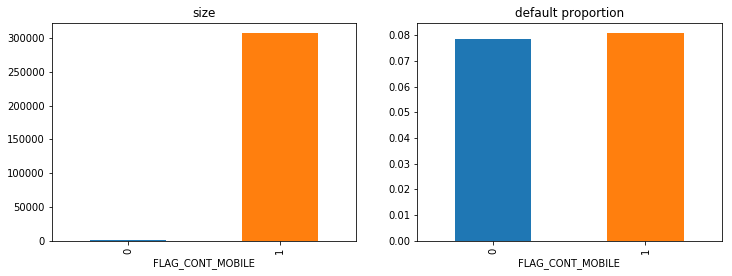

In [104]:
# FLAG_CONT_MOBILE: Was mobile phone reachable (1=YES, 0=NO)
df = application_train.groupby('FLAG_CONT_MOBILE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Not very useful as most of the mobiles could be reached. Also, default proportion is similar across two groups.

TARGET          
             count      mean
FLAG_PHONE                  
0           221080  0.084784
1            86431  0.070357

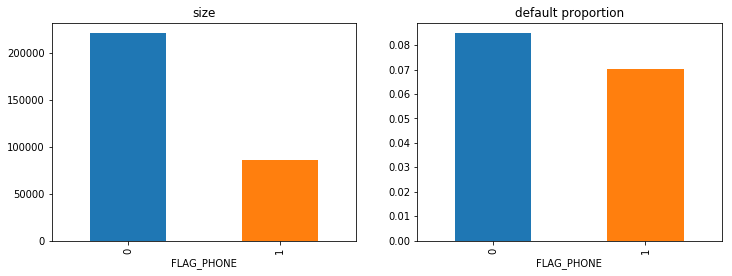

In [105]:
# FLAG_PHONE: Did client provide home phone (1=YES, 0=NO)
df = application_train.groupby('FLAG_PHONE').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Seems to be a useful feature, as default rate is lower for peoplw who provided home phones.

TARGET          
             count      mean
FLAG_EMAIL                  
0           290069  0.080846
1            17442  0.078775

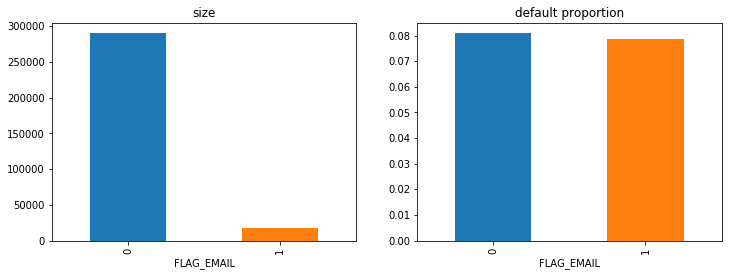

In [106]:
# FLAG_EMAIL: Did client provide email (1=YES, 0=NO)
df = application_train.groupby('FLAG_EMAIL').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Most of the people did not provide email, but there is not much difference in default rates between two groups.

TARGET          
                       count      mean
REGION_RATING_CLIENT                  
1                      32197  0.048203
2                     226984  0.078891
3                      48330  0.111028

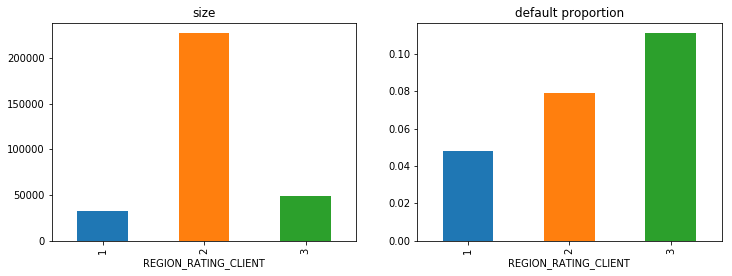

In [107]:
# REGION_RATING_CLIENT: Our rating of the region where client lives (1,2,3)
df = application_train.groupby('REGION_RATING_CLIENT').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Seems to be a useful variable, with default-rates going up with region ratings.

TARGET          
                              count      mean
REGION_RATING_CLIENT_W_CITY                  
1                             34167  0.048409
2                            229484  0.079178
3                             43860  0.114022

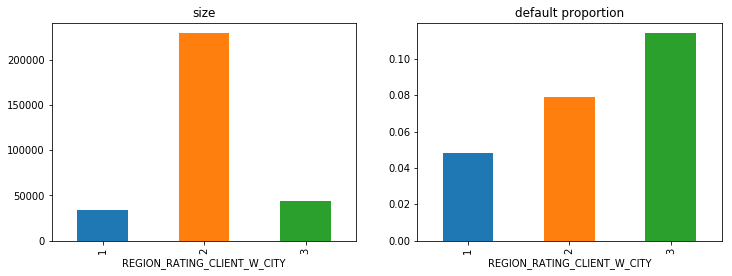

In [108]:
# REGION_RATING_CLIENT_W_CITY: Our rating of the region where client lives with taking city into account (1,2,3)
df = application_train.groupby('REGION_RATING_CLIENT_W_CITY').agg({'TARGET': ['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

Again useful, with default-rates increasing with ratings. But should be strongly correlated with REGION_RATING_CLIENT.

In [109]:
# FLAG_DOCUMENT_2-22: Did client provide document
doc_no = np.zeros(20).astype(str)
count_yes = np.zeros(20).astype(int)
perc_yes = np.zeros(20)
default_perc_nodoc = np.zeros(20)
default_perc_yesdoc = np.zeros(20)
for i in range(0, 20):
    x = 'FLAG_DOCUMENT_{}'.format(i+2)
    df = application_train.groupby(x).agg({'TARGET': ['count', 'mean']})
    doc_no[i] = x
    count_yes[i] = df.iloc[:, 0][1]
    perc_yes[i] = round(df.iloc[:, 0][1]/np.sum(df.iloc[:, 0])*100, 1)
    default_perc_nodoc[i] = round(df.iloc[:, 1][0]*100, 1)
    default_perc_yesdoc[i] = round(df.iloc[:, 1][1]*100, 1)
pd.DataFrame({'doc_no': doc_no, 'count_yes': count_yes, 'perc_yes': perc_yes, 'default_perc_nodoc': default_perc_nodoc, 
              'default_perc_yesdoc': default_perc_yesdoc}).set_index('doc_no')

,count_yes,perc_yes,default_perc_nodoc,default_perc_yesdoc
doc_no,,,,
FLAG_DOCUMENT_2,13,0.0,8.1,30.8
FLAG_DOCUMENT_3,218340,71.0,6.2,8.8
FLAG_DOCUMENT_4,25,0.0,8.1,0.0
FLAG_DOCUMENT_5,4648,1.5,8.1,8.0
FLAG_DOCUMENT_6,27078,8.8,8.3,5.6
FLAG_DOCUMENT_7,59,0.0,8.1,5.1
FLAG_DOCUMENT_8,25024,8.1,8.1,7.3
FLAG_DOCUMENT_9,1198,0.4,8.1,6.2
FLAG_DOCUMENT_10,7,0.0,8.1,0.0


FLAG_DOCUMENT_2: Most of the people have not provided the document. Surprisingly default-rate is higher for the people who provided.    
FLAG_DOCUMENT_3: Seems to  be significant, as there is high number of people in both yes and no. Surprisingly default-rate is higher for the people who provided.    
FLAG_DOCUMENT_4: Very few people have provided the document. Though the default-rate is very low for those who provided.   
FLAG_DOCUMENT_5: Not very useful, as the default-rates are same  between two groups.    
FLAG_DOCUMENT_6: Useful, as default-rates are lower for the people who provided this document.    
FLAG_DOCUMENT_7: Very few people have provided the document. Though the default-rate is lower for those who provided.    
FLAG_DOCUMENT_8: Default-rate is slightly lower for those who provided.    
FLAG_DOCUMENT_9: Default-rate is lower for those who provided.    
FLAG_DOCUMENT_10: Just 7 people provided this document. None of them defaulted.    
FLAG_DOCUMENT_11: Default-rate is slightly lower for those who provided the document.    
FLAG_DOCUMENT_12: 	Just 2 people provided this document. Neither of them defaulted.    
FLAG_DOCUMENT_13: Default-rate is slightly lower for those who provided the document.    
FLAG_DOCUMENT_14: Default-rate is very low for those who provided.    
FLAG_DOCUMENT_15: Default-rate is very low for those who provided.    
FLAG_DOCUMENT_16: Default-rate is very low for those who provided.    
FLAG_DOCUMENT_17: Very few people have provided the document. Though the default-rate is very low for those who provided.   
FLAG_DOCUMENT_18: Default-rate is lower for those who provided.    
FLAG_DOCUMENT_19: Very few people have provided the document. Default-rate is slightly lower for those who provided.    
FLAG_DOCUMENT_20: Very few people have provided the document. Not much difference in default-rates between two groups.    
FLAG_DOCUMENT_21: Very few people have provided the document. Default-rate is higher for those who provided.    

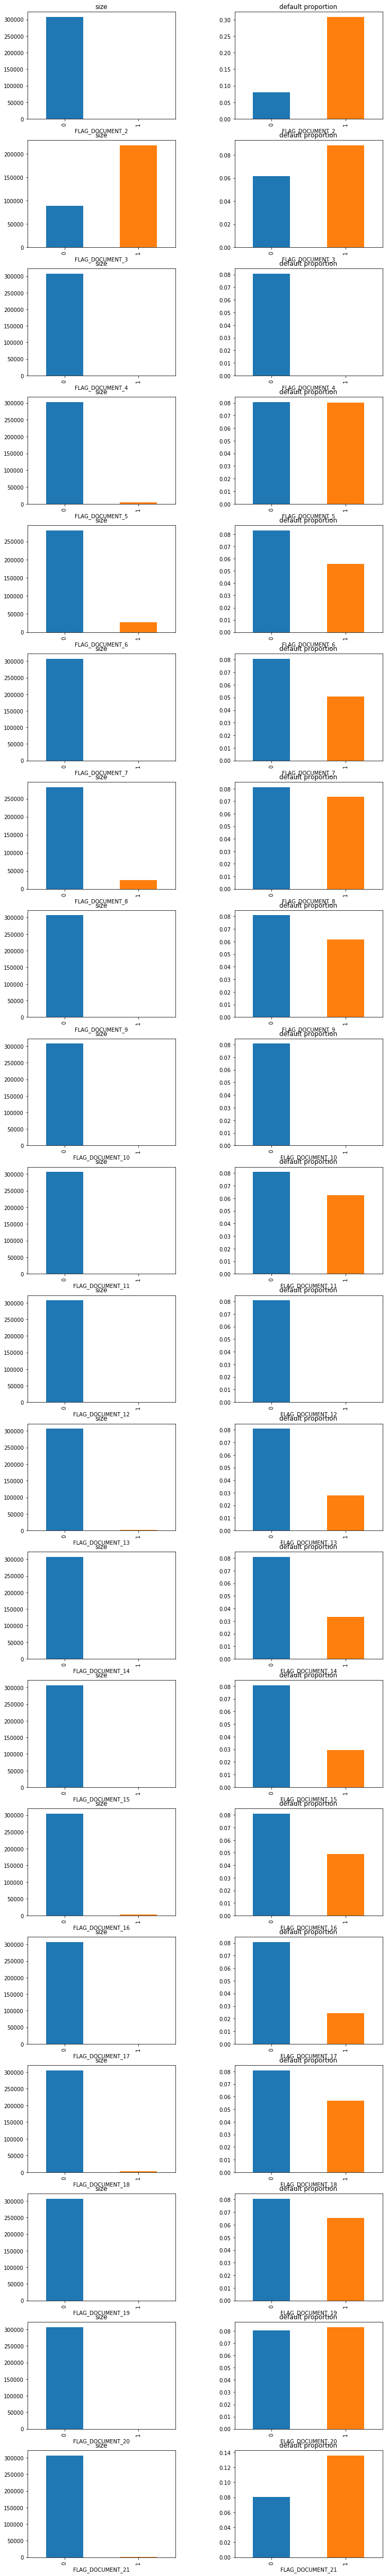

In [110]:
fig = plt.figure(figsize=(12, 80))
for i in range(2, 22):
    x = 'FLAG_DOCUMENT_{}'.format(i)
    df = application_train.groupby(x).agg({'TARGET': ['count', 'mean']})  
    plt.subplot(21, 2, 2*i-3)
    df.iloc[:, 0].plot.bar(title='size')
    plt.subplot(21, 2, (i-1)*2)
    df.iloc[:, 1].plot.bar(title='default proportion')   
plt.subplots_adjust(top = 1, wspace = 0.4)

#### Exploring categorical variables

In [180]:
application_train.dtypes[application_train.dtypes == 'O'].index

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

TARGET          
                     count      mean
NAME_CONTRACT_TYPE                  
Cash loans          278232  0.083459
Revolving loans      29279  0.054783

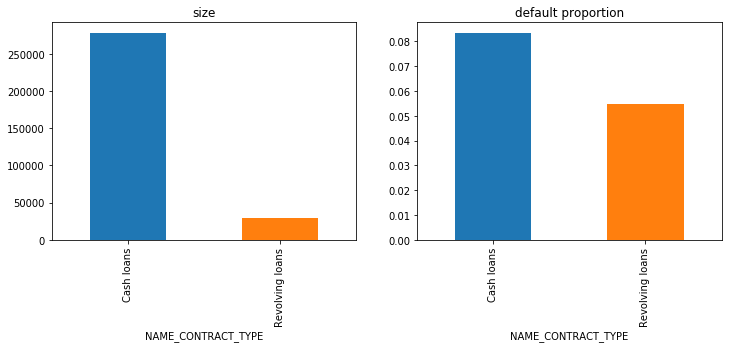

In [179]:
# NAME_CONTRACT_TYPE: Identification if loan is cash or revolving
df = application_train.groupby('NAME_CONTRACT_TYPE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
              count      mean
CODE_GENDER                  
F            202448  0.069993
M            105059  0.101419

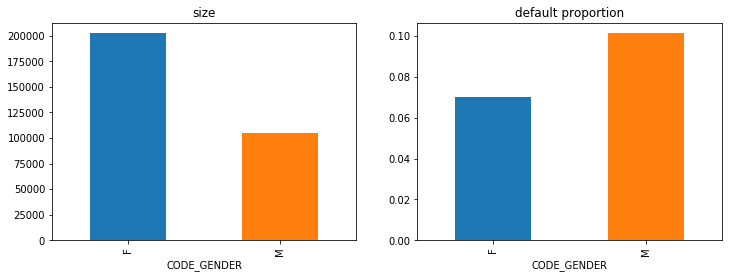

In [181]:
# CODE_GENDER: Gender of the client
df = application_train.groupby('CODE_GENDER').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
               count      mean
FLAG_OWN_CAR                  
N             202924  0.085002
Y             104587  0.072437

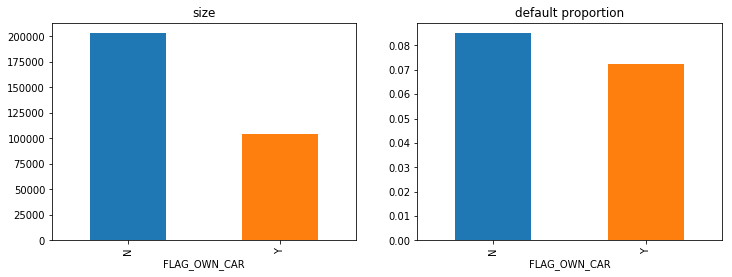

In [182]:
# FLAG_OWN_CAR: Flag if the client owns a car
df = application_train.groupby('FLAG_OWN_CAR').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                  count      mean
FLAG_OWN_REALTY                  
N                 94199  0.083249
Y                213312  0.079616

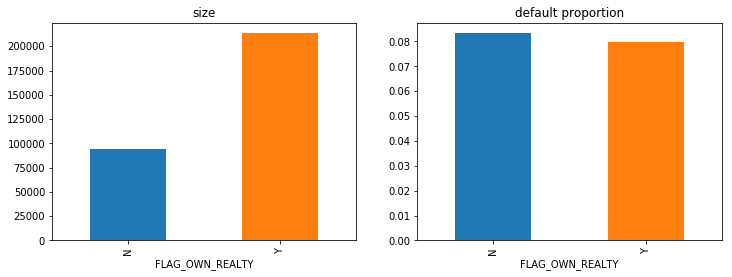

In [183]:
# FLAG_OWN_REALTY: Flag if client owns a house or flat
df = application_train.groupby('FLAG_OWN_REALTY').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                  count      mean
NAME_TYPE_SUITE                  
Children           3267  0.073768
Family            40149  0.074946
Group of people     271  0.084871
Other_A             866  0.087760
Other_B            1770  0.098305
Spouse, partner   11370  0.078716
Unaccompanied    248526  0.081830

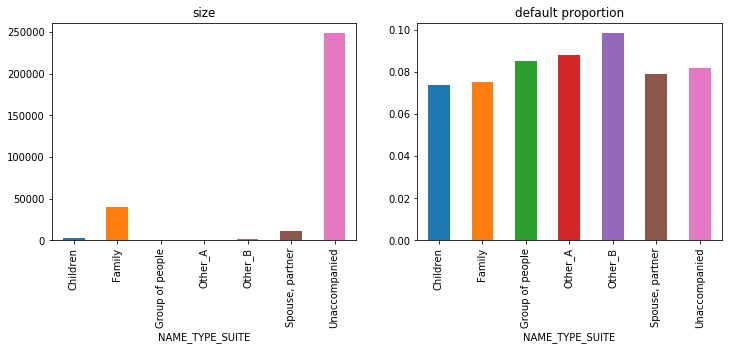

In [184]:
# NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan
df = application_train.groupby('NAME_TYPE_SUITE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                       count      mean
NAME_INCOME_TYPE                      
Businessman               10  0.000000
Commercial associate   71617  0.074843
Maternity leave            5  0.400000
Pensioner              55362  0.053864
State servant          21703  0.057550
Student                   18  0.000000
Unemployed                22  0.363636
Working               158774  0.095885

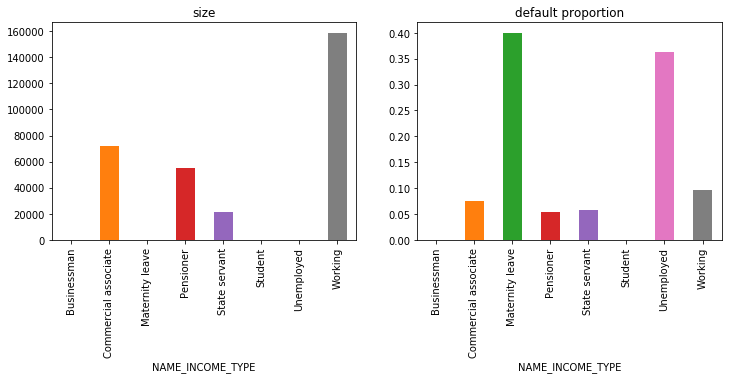

In [185]:
# NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave,…)
df = application_train.groupby('NAME_INCOME_TYPE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                                count      mean
NAME_EDUCATION_TYPE                            
Academic degree                   164  0.018293
Higher education                74863  0.053551
Incomplete higher               10277  0.084850
Lower secondary                  3816  0.109277
Secondary / secondary special  218391  0.089399

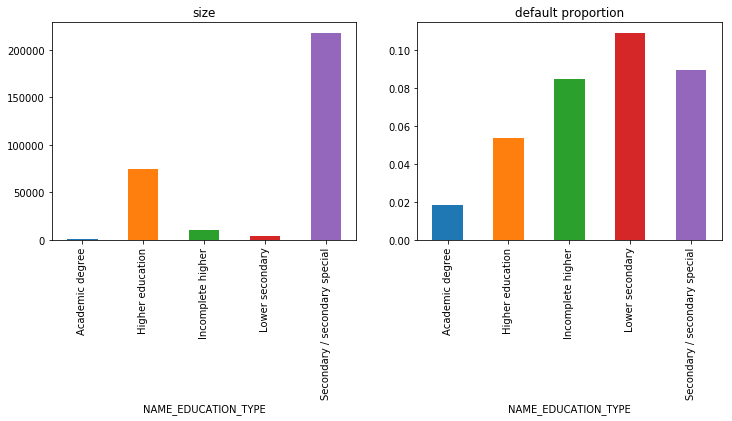

In [186]:
# NAME_EDUCATION_TYPE: Level of highest education the client achieved
df = application_train.groupby('NAME_EDUCATION_TYPE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                       count      mean
NAME_FAMILY_STATUS                    
Civil marriage         29775  0.099446
Married               196432  0.075599
Separated              19770  0.081942
Single / not married   45444  0.098077
Unknown                    2  0.000000
Widow                  16088  0.058242

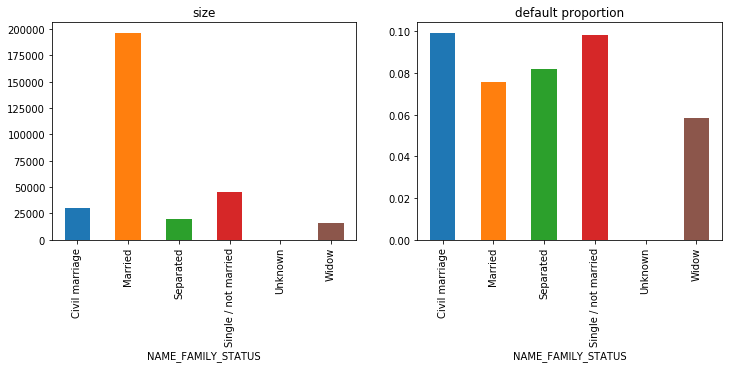

In [187]:
# NAME_FAMILY_STATUS: Family status of the client
df = application_train.groupby('NAME_FAMILY_STATUS').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                      count      mean
NAME_HOUSING_TYPE                    
Co-op apartment        1122  0.079323
House / apartment    272868  0.077957
Municipal apartment   11183  0.085397
Office apartment       2617  0.065724
Rented apartment       4881  0.123131
With parents          14840  0.116981

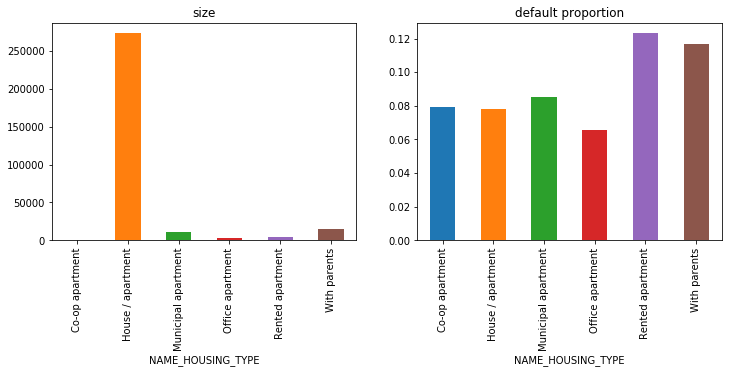

In [188]:
# NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...)
df = application_train.groupby('NAME_HOUSING_TYPE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                       count      mean
OCCUPATION_TYPE                       
Accountants             9813  0.048303
Cleaning staff          4653  0.096067
Cooking staff           5946  0.104440
Core staff             27570  0.063040
Drivers                18603  0.113261
HR staff                 563  0.063943
High skill tech staff  11380  0.061599
IT staff                 526  0.064639
Laborers               55186  0.105788
Low-skill Laborers      2093  0.171524
Managers               21371  0.062140
Medicine staff          8537  0.067002
Private service staff   2652  0.065988
Realty agents            751  0.078562
Sales staff            32102  0.096318
Secretaries             1305  0.070498
Security staff          6721  0.107424
Waiters/barmen staff    1348  0.112760

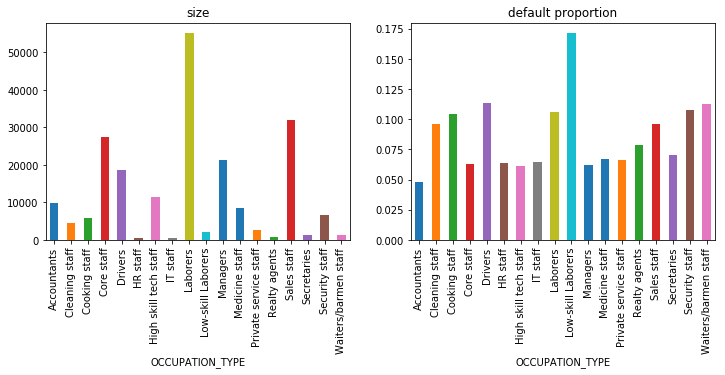

In [189]:
# OCCUPATION_TYPE: What kind of occupation does the client have
df = application_train.groupby('OCCUPATION_TYPE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                            count      mean
WEEKDAY_APPR_PROCESS_START                 
FRIDAY                      50338  0.081469
MONDAY                      50714  0.077572
SATURDAY                    33852  0.078873
SUNDAY                      16181  0.079291
THURSDAY                    50591  0.081003
TUESDAY                     53901  0.083505
WEDNESDAY                   51934  0.081604

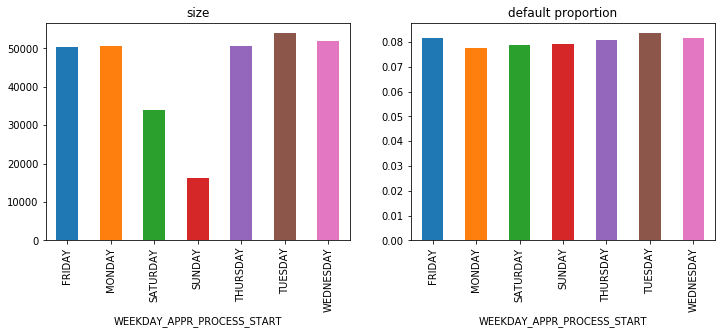

In [190]:
# WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan
df = application_train.groupby('WEEKDAY_APPR_PROCESS_START').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                        count      mean
ORGANIZATION_TYPE                      
Advertising               429  0.081585
Agriculture              2454  0.104727
Bank                     2507  0.051855
Business Entity Type 1   5984  0.081384
Business Entity Type 2  10553  0.085284
Business Entity Type 3  67992  0.092996
Cleaning                  260  0.111538
Construction             6721  0.116798
Culture                   379  0.055409
Electricity               950  0.066316
Emergency                 560  0.071429
Government              10404  0.069781
Hotel                     966  0.064182
Housing                  2958  0.079446
Industry: type 1         1039  0.110683
Industry: type 10         109  0.064220
Industry: type 11        2704  0.086538
Industry: type 12         369  0.037940
Industry: type 13          67  0.134328
Industry: type 2          458  0.072052
Industry: type 3         3278  0.106162
Industry: type 4          877  0.101482
Industry: type 5          599  0.068447
Industry: type 6          112  0.071429
Industry: type 7         1307  0.080337
Industry: type 8           24  0.125000
Industry: type 9         3368  0.066805
Insurance                 597  0.056951
Kindergarten             6880  0.070349
Legal Services            305  0.078689
Medicine                11193  0.065845
Military                 2634  0.051253
Mobile                    317  0.091483
Other                   16683  0.076425
Police                   2341  0.049979
Postal                   2157  0.084376
Realtor                   396  0.106061
Religion                   85  0.058824
Restaurant               1811  0.117062
School                   8893  0.059148
Security                 3247  0.099784
Security Ministries      1974  0.048632
Self-employed           38412  0.101739
Services                 1575  0.066032
Telecom                   577  0.076256
Trade: type 1             348  0.089080
Trade: type 2            1900  0.070000
Trade: type 3            3492  0.103379
Trade: type 4              64  0.031250
Trade: type 5              49  0.061224
Trade: type 6             631  0.045959
Trade: type 7            7831  0.094496
Transport: type 1         201  0.044776
Transport: type 2        2204  0.078040
Transport: type 3        1187  0.157540
Transport: type 4        5398  0.092812
University               1327  0.048983

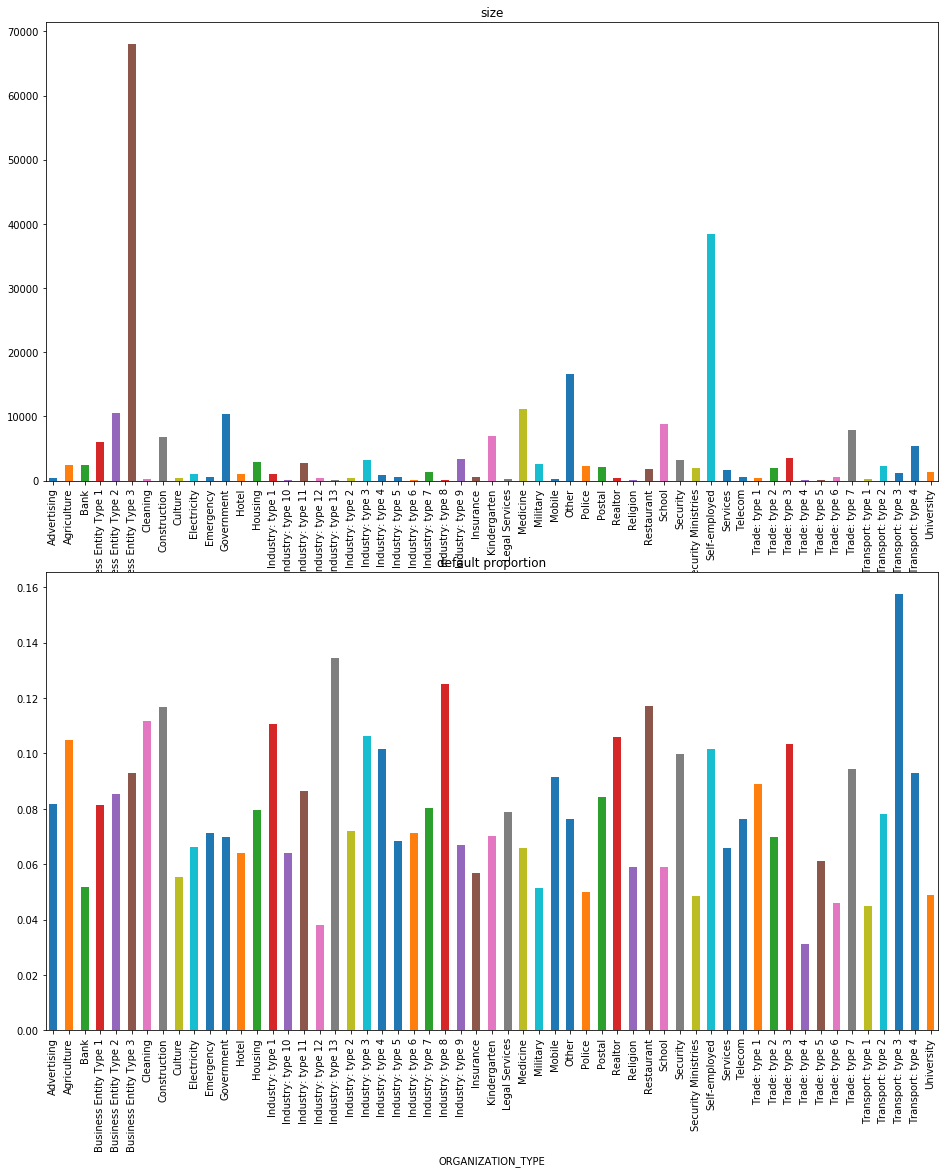

In [197]:
# ORGANIZATION_TYPE: Type of organization where client works
df = application_train.groupby('ORGANIZATION_TYPE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(2, 1, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
plt.subplots_adjust(top = 1)
df

TARGET          
                       count      mean
FONDKAPREMONT_MODE                    
not specified           5687  0.075435
org spec account        5619  0.058195
reg oper account       73830  0.069782
reg oper spec account  12080  0.065563

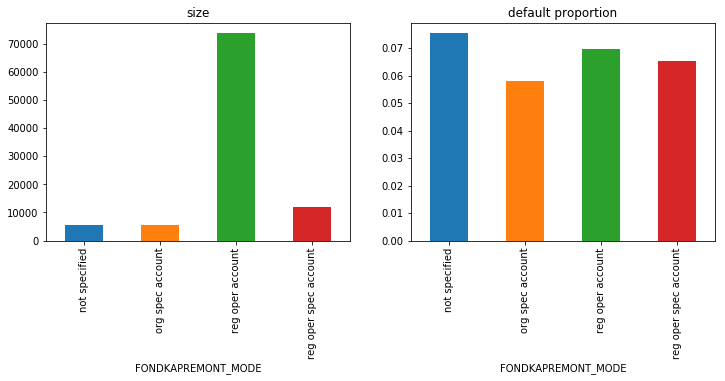

In [199]:
# FONDKAPREMONT_MODE: ???
df = application_train.groupby('FONDKAPREMONT_MODE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                   count      mean
HOUSETYPE_MODE                    
block of flats    150503  0.069434
specific housing    1499  0.101401
terraced house      1212  0.084983

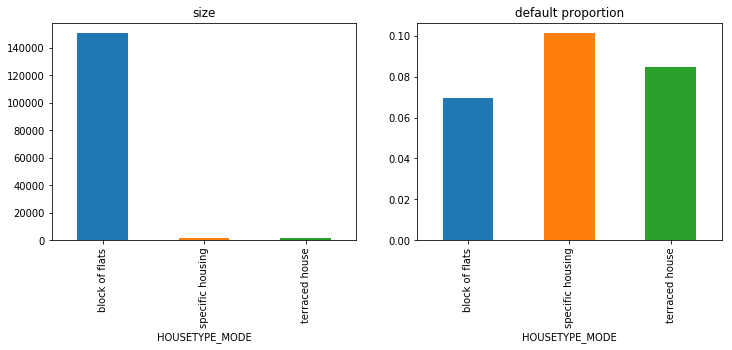

In [200]:
# HOUSETYPE_MODE: Normalized information about building where the client lives, What is modus (_MODE suffix) house type
df = application_train.groupby('HOUSETYPE_MODE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                    count      mean
WALLSMATERIAL_MODE                 
Block                9253  0.070247
Mixed                2296  0.075348
Monolithic           1779  0.047218
Others               1625  0.083077
Panel               66040  0.063477
Stone, brick        64815  0.074057
Wooden               5362  0.096979

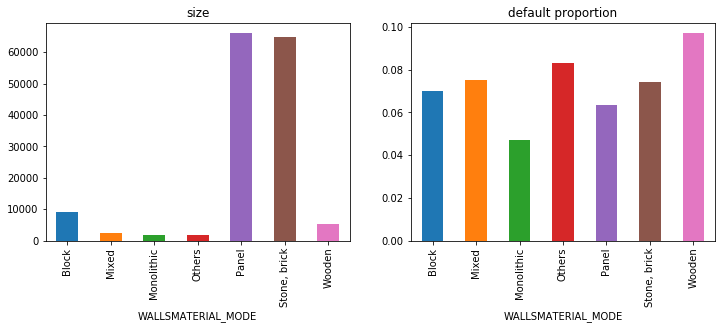

In [201]:
# WALLSMATERIAL_MODE: Normalized information about building where the client lives, What is modus (_MODE suffix) Walls Material
df = application_train.groupby('WALLSMATERIAL_MODE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

TARGET          
                      count      mean
EMERGENCYSTATE_MODE                  
No                   159428  0.069649
Yes                    2328  0.095790

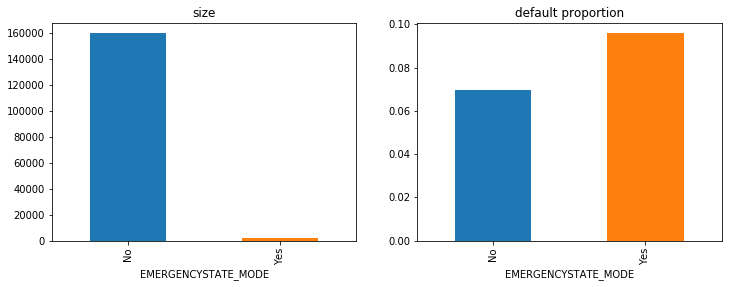

In [202]:
# EMERGENCYSTATE_MODE: Normalized information about building where the client lives, What is modus (_MODE suffix) Emergency State
df = application_train.groupby('EMERGENCYSTATE_MODE').agg({'TARGET':['count', 'mean']})
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.iloc[:, 0].plot.bar(title='size')
plt.subplot(1, 2, 2)
df.iloc[:, 1].plot.bar(title='default proportion')
df

### Missing Values

In [129]:
prop_missing = pd.isnull(application_train).sum(axis = 0)[pd.isnull(application_train).sum(axis = 0) > 0]/application_train.shape[0]

In [130]:
# proportion of missing in categorical variables
categorical_var = application_train.dtypes[application_train.dtypes == 'object']
cat_df = application_train[categorical_var.index]
cat_missing = pd.isnull(cat_df).sum(axis = 0)[pd.isnull(cat_df).sum(axis = 0) > 0]/cat_df.shape[0]

In [131]:
# proportion of missing in numerical variables
numerical_var = application_train.dtypes[application_train.dtypes != 'object']
num_df = application_train[numerical_var.index]
num_missing = pd.isnull(num_df).sum(axis = 0)[pd.isnull(num_df).sum(axis = 0) > 0]/num_df.shape[0]

We are not sure about the method for imputing missing values, so will try different methods and see which gives us better test results in logistic regression. Will use that for further modelling.